# Alireza Razzaghi
# MA Computational Linguistics

https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?resource=download

Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

To help you compare vehicles from different model years, the fuel consumption ratings for 2000 to 2022 vehicles have been adjusted to reflect the improved testing that is more representative of everyday driving. Note that these are approximate values that were generated from the original ratings, not from vehicle testing.

Original data to [Open Canada Data](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

About this file

Add Suggestion
### Model

- 4WD/4X4: Four-wheel drive
- AWD: All-wheel drive
- CNG: Compressed natural gas
- FFV: Flexible-fuel vehicle
- NGV: Natural gas vehicle
- #: High output engine that provides more power than the standard engine of the same size

### Transmission

- A: Automatic
- AM: Automated manual
- AS: Automatic with select shift
- AV: Continuously variable
- M: Manual
- 3 - 10: Number of gears

### Fuel Type

- X: Regular gasoline
- Z: Premium gasoline
- D: Diesel
- E: Ethanol (E85)
- N: Natural Gas

### Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

Based on this [link](https://www.ageco.co.uk/useful-articles/car/what-are-the-co2-emissions-of-my-car/)

- 150g/km emission is considered low
- 160 to 255g/km emission is considered medium
- Above 255g/km emission is considered high

Finding emmision based on other features

In [162]:
# regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
# open the dataset
Dataset_initial = pd.read_csv("Fuel_Consumption_2000-2022.csv")

In [3]:
Dataset_initial.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
# check the columns for null or missing values
Dataset_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [5]:
Dataset_initial.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [6]:
def get_null_features(df, df_name):
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if null_columns.empty:
        print(f"No null values found in {df_name}")
    else:
        print(f"Features with null values in {df_name}:")
        print(null_columns)

get_null_features(Dataset_initial, "Dataset_initial")

No null values found in Dataset_initial


In [7]:
import numpy as np

# Calculate the number of data points in the dataset
num_data_points = len(Dataset_initial)

# Calculate the number of bins using the Square Root Rule
num_bins = int(np.sqrt(num_data_points))

print("Number of Data Points:", num_data_points)
print("Number of Bins (Square Root Rule):", num_bins)


Number of Data Points: 22556
Number of Bins (Square Root Rule): 150


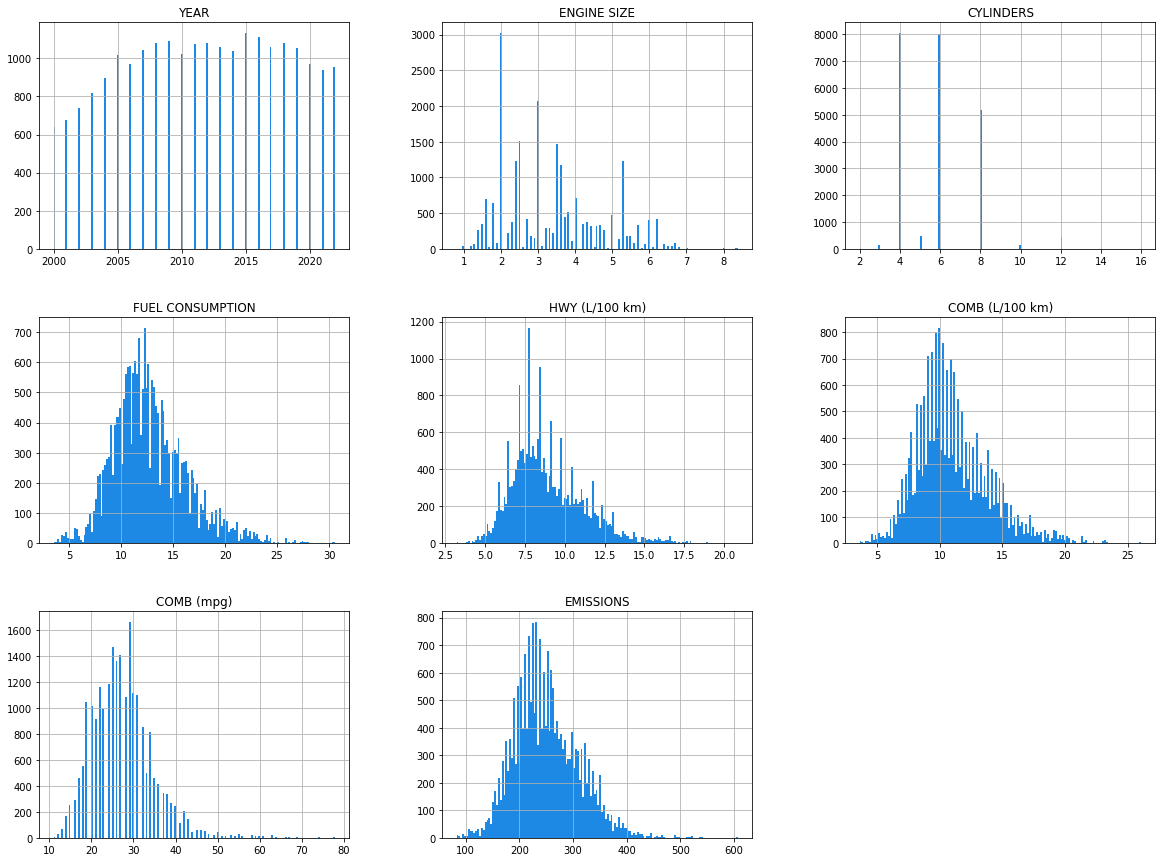

In [8]:
# Visualizing histograms
%matplotlib inline
import matplotlib.pyplot as plt

Dataset_initial.hist(bins=150, figsize=(20,15), color='#1E88E5')
plt.show()

In [9]:
Dataset_initial.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
target_cols = ['EMISSIONS']  # Since 'EMISSIONS' is the only target column in this case
features_cols = ['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION',
                'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)']

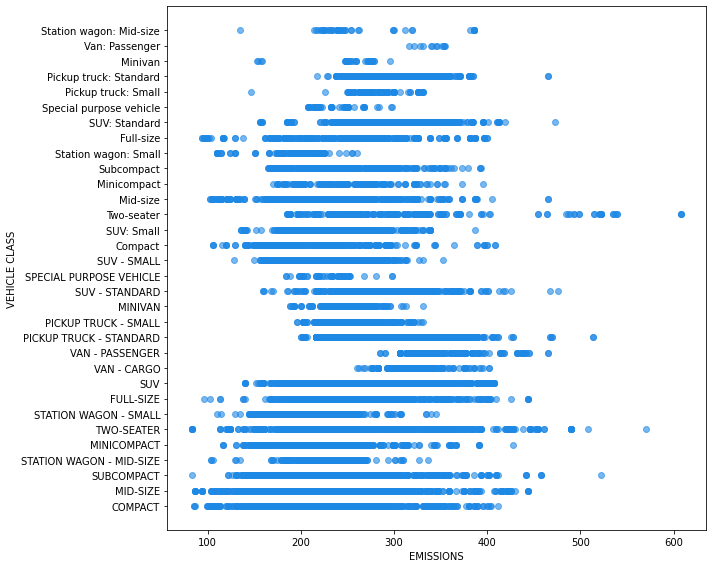

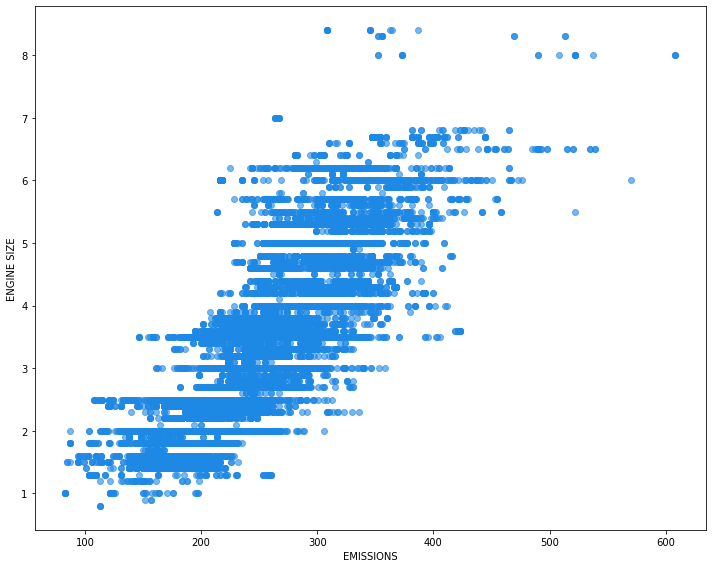

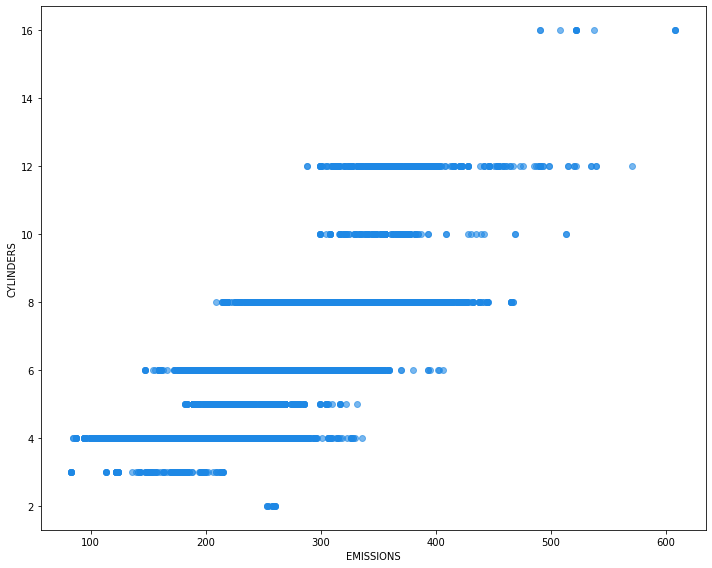

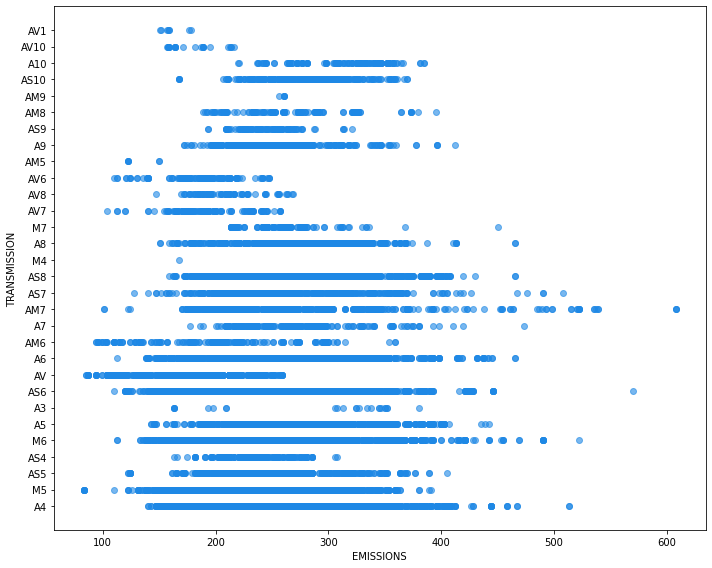

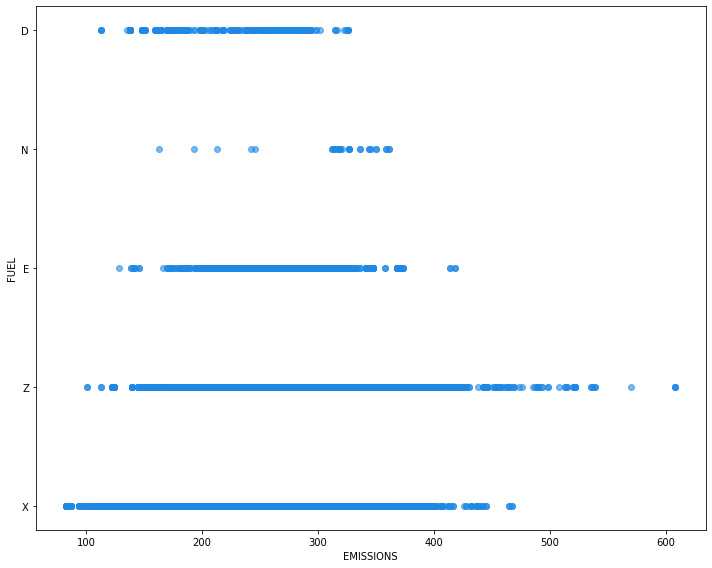

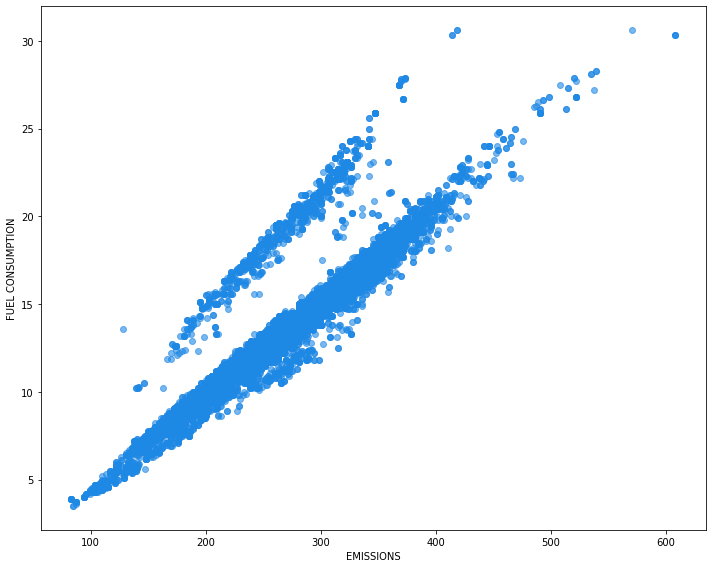

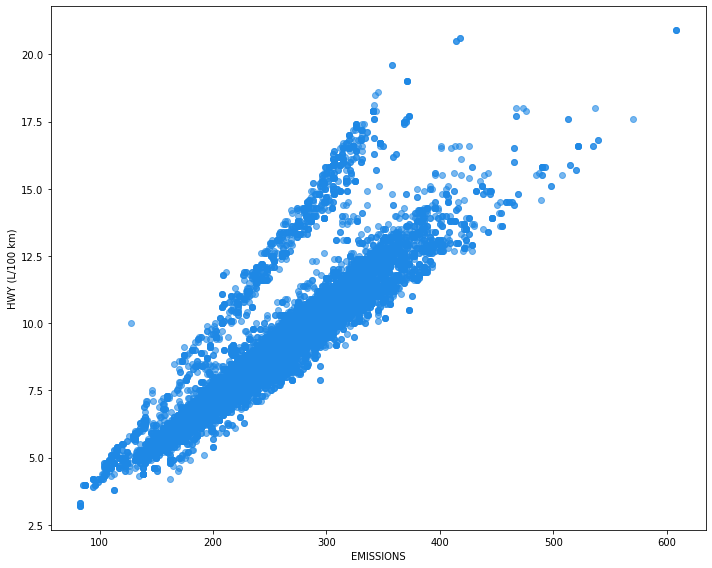

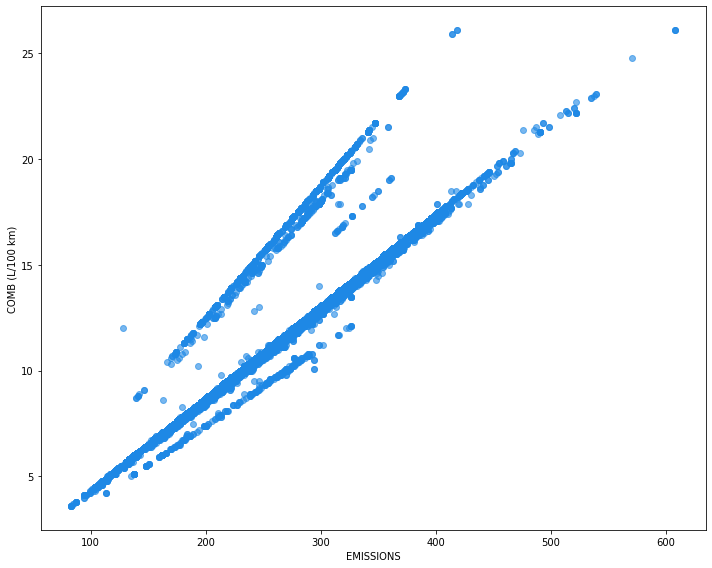

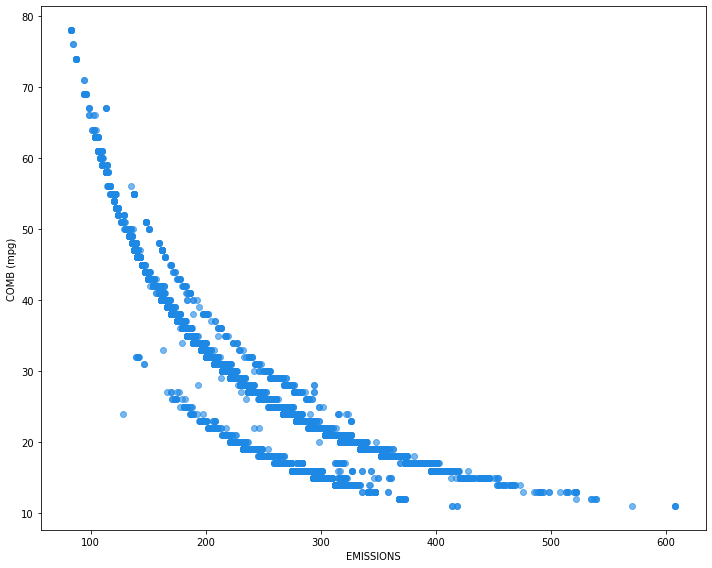

In [11]:
import matplotlib.pyplot as plt

targets_cols = ['EMISSIONS']  
features_cols = ['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION',
                'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)']
num_features = len(features_cols)

# scatter plots
for feature_col in features_cols:
    fig, axs = plt.subplots(1, len(targets_cols), figsize=(10, 8))
    for target_col in targets_cols:
        axs.scatter(Dataset_initial[target_col], Dataset_initial[feature_col], color='#1E88E5', alpha=0.6)
        axs.set_xlabel(target_col)
        axs.set_ylabel(feature_col)
    plt.tight_layout()
    plt.show()


no relation between emssion and vehicle class, engine size, cylinders, trasmission, fuel.

In [12]:
Dataset_initial

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [5]:
#segment emission to low, medium and high
Dataset_initial["CO2 Emission Class"] = pd.cut(Dataset_initial["EMISSIONS"],
                               bins=[0.,160, 255,np.inf],
                               labels=["low", "medium", "high"])

In [6]:
print(Dataset_initial["CO2 Emission Class"].value_counts())

CO2 Emission Class
medium    12338
high       9287
low         931
Name: count, dtype: int64


In [7]:
print(Dataset_initial["CYLINDERS"].value_counts())

CYLINDERS
4     8049
6     8021
8     5187
5      499
12     451
10     162
3      159
2       16
16      12
Name: count, dtype: int64


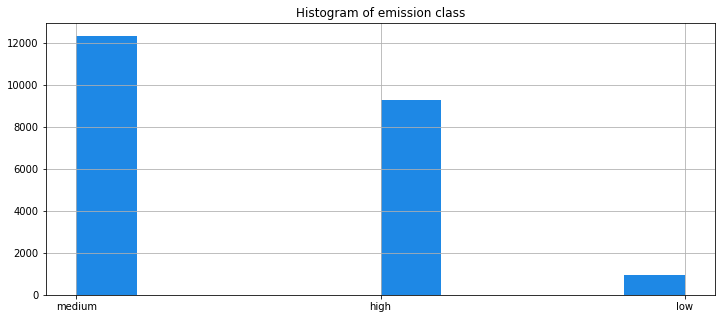

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# histogram for 'Emission'
plt.plot(1, 2, 1)
Dataset_initial["CO2 Emission Class"].hist(color='#1E88E5')
plt.title('Histogram of emission class')


plt.show()


In [9]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
emission_cat = Dataset_initial[["CO2 Emission Class"]]
emission_cat_1hot = cat_encoder.fit_transform(emission_cat)

In [10]:
import pandas as pd

# Create a DataFrame from the one-hot encoded representation
emission_cat_1hot_df = pd.DataFrame(emission_cat_1hot, columns=cat_encoder.get_feature_names_out())

# Concatenate the one-hot encoded DataFrame with the original DataFrame
Full_dataset = pd.concat([Dataset_initial, emission_cat_1hot_df], axis=1)



In [11]:
Full_dataset.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0


In [12]:
fuel_cat =  Dataset_initial[['FUEL']]
fuel_cat_1hot = cat_encoder.fit_transform(fuel_cat)

fuel_cat_1hot_df = pd.DataFrame(fuel_cat_1hot, columns=cat_encoder.get_feature_names_out())

Full_dataset2 = pd.concat([Full_dataset, fuel_cat_1hot_df], axis=1)

In [9]:
pd.set_option('display.max_columns', None) #see all columns

In [14]:
Full_dataset2.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
TRANSMISSION_cat =  Dataset_initial[['TRANSMISSION']]
TRANSMISSION_cat_1hot = cat_encoder.fit_transform(TRANSMISSION_cat)

TRANSMISSION_cat_1hot_df = pd.DataFrame(TRANSMISSION_cat_1hot, columns=cat_encoder.get_feature_names_out())

Full_dataset3 = pd.concat([Full_dataset2, TRANSMISSION_cat_1hot_df], axis=1)

In [16]:
Full_dataset3.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
Full_dataset3.to_csv('Full_dataset3.csv')

In [3]:
import pandas as pd
Full_dataset3 = pd.read_csv('Full_dataset3.csv')

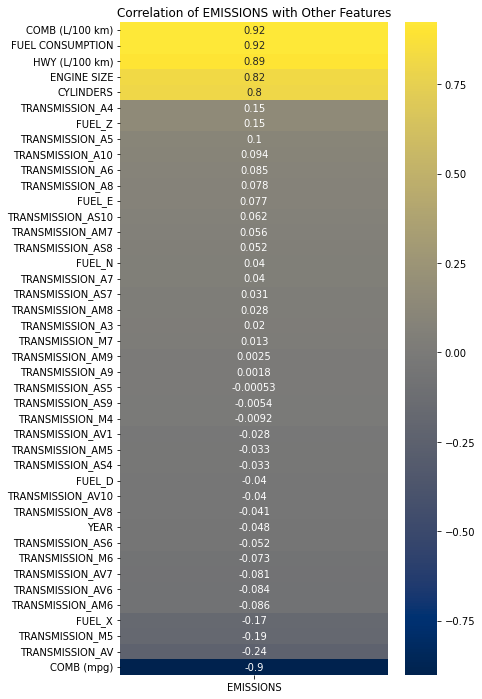

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_data = Full_dataset3.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

emission_corr = correlation_matrix['EMISSIONS']
emission_corr_df = emission_corr.drop(['EMISSIONS', 'Unnamed: 0', 'CO2 Emission Class_high',
                                      'CO2 Emission Class_low', 'CO2 Emission Class_medium']).to_frame()

# Sort correlation values
emission_corr_df_sorted = emission_corr_df.sort_values(by='EMISSIONS', ascending=False)

# Plotting the sorted correlation of 'EMISSIONS' with other features
plt.figure(figsize=(6, 12))
sns.heatmap(emission_corr_df_sorted, annot=True, cmap='cividis')
plt.title('Correlation of EMISSIONS with Other Features')
plt.show()


Linearity with engine size, cylinders, fuel consumptuin, HWY, COMB, COMB (mpg)

In [52]:
Full_dataset3.head(3)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


COMB (L/100 km), COMB (mpg), FUEL E

# The notebook in kaggle 
achieved lower scores [link](https://www.kaggle.com/code/solarielee/fuel-consumption) for linear regression and random forest and decision tree by using 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)','EMISSIONS'.

Maybe it would be better for me to only use COMB (L/100 km)

In [53]:
Full_dataset3.head(3)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
linear_df_features = Full_dataset3[["ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)",
                                    "COMB (L/100 km)", "COMB (mpg)", "EMISSIONS"]]
RadnomFregressorf_df = Full_dataset3[["COMB (L/100 km)", "COMB (mpg)", "FUEL_E", "EMISSIONS"]]
#df_labels_regression = Full_dataset3["EMISSIONS"]

In [61]:
linear_df_features

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,1.6,4,9.2,6.7,8.1,35,186
1,1.6,4,8.5,6.5,7.6,37,175
2,3.2,6,12.2,7.4,10.0,28,230
3,3.5,6,13.4,9.2,11.5,25,264
4,1.8,4,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...
22551,2.0,4,10.7,7.7,9.4,30,219
22552,2.0,4,10.5,8.1,9.4,30,219
22553,2.0,4,11.0,8.7,9.9,29,232
22554,2.0,4,11.5,8.4,10.1,28,236


In [6]:
np.random.seed(42)

from sklearn.model_selection import StratifiedShuffleSplit

# Assuming your data is in a DataFrame called Full_dataset3
features = Full_dataset3.drop(["CO2 Emission Class_high", "CO2 Emission Class_low", "CO2 Emission Class_medium"], axis=1)
target = Full_dataset3["CO2 Emission Class"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(features, target):
    stratified_train = features.loc[train_index]
    stratified_test = features.loc[test_index]

stratified_test["CO2 Emission Class"].value_counts() / len(stratified_test)


CO2 Emission Class
medium    0.546986
high      0.411791
low       0.041223
Name: count, dtype: float64

In [7]:
Full_dataset3["CO2 Emission Class"].value_counts() / len(Full_dataset3)

CO2 Emission Class
medium    0.546994
high      0.411731
low       0.041275
Name: count, dtype: float64

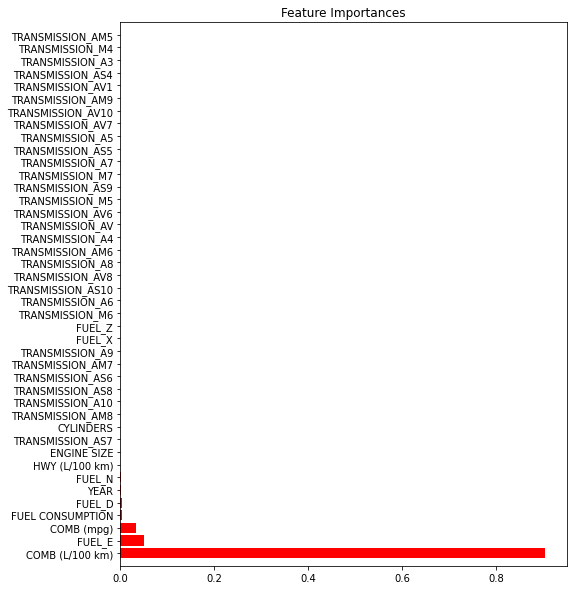

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Selecting only numeric columns from the dataset
numeric_data = Full_dataset3.select_dtypes(include=['number'])

# Assuming 'EMISSIONS' is already separated as the target column
X = numeric_data.drop(['EMISSIONS',"CO2 Emission Class_high", "CO2 Emission Class_low", "CO2 Emission Class_medium",
                       'Unnamed: 0'] , axis=1)
y = numeric_data['EMISSIONS']

# Train a RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 10))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")  # Swap x and y axis
plt.yticks(range(X.shape[1]), X.columns[indices])  # Set y-axis ticks as feature names
plt.ylim([-1, X.shape[1]])  # Set y-axis limit
plt.show()


In [63]:
stratified_train

,Unnamed: 0,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
5965,5965,2007,CHEVROLET,IMPALA,FULL-SIZE,3.9,6,A4,X,11.9,7.5,9.9,29,228,medium,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14875,14875,2015,JEEP,PATRIOT 4X4 TRAIL RATED,SUV - SMALL,2.4,4,AV,X,11.7,10.3,11.1,25,255,medium,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12247,12247,2013,BMW,650i xDRIVE COUPE,COMPACT,4.4,8,A8,Z,13.2,8.3,11.0,26,253,medium,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8487,8487,2009,KIA,RIO,COMPACT,1.6,4,A4,X,7.7,5.6,6.8,42,156,low,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13566,13566,2014,FORD,F150,PICKUP TRUCK - STANDARD,3.5,6,A6,X,12.9,9.0,11.1,25,255,medium,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,3591,2004,SAAB,9-3 ARC TURBO,COMPACT,2.0,4,M5,Z,10.9,7.2,9.2,31,212,medium,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9960,9960,2010,VOLKSWAGEN,PASSAT WAGON,STATION WAGON - MID-SIZE,2.0,4,AS6,Z,9.6,6.6,8.3,34,191,medium,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17858,17858,2018,Dodge,Journey,SUV: Small,2.4,4,A4,X,12.7,9.2,11.1,25,261,high,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13789,13789,2014,JEEP,PATRIOT,SUV - SMALL,2.0,4,M5,X,8.9,6.6,7.9,36,182,medium,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [154]:
Linear_data_train = stratified_train[["ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)",
                                    "COMB (L/100 km)", "COMB (mpg)"]]
Linear_data_test = stratified_test[["ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)",
                                    "COMB (L/100 km)", "COMB (mpg)"]]

label_train = stratified_train["EMISSIONS"]
label_test = stratified_test["EMISSIONS"]

RandomFregressot_data_train = stratified_train[["COMB (L/100 km)", "COMB (mpg)", "FUEL_E"]]
RandomFregressot_data_test = stratified_test[["COMB (L/100 km)", "COMB (mpg)", "FUEL_E"]]

All_data_train = (stratified_train.drop(['EMISSIONS',"CO2 Emission Class"] , axis=1)).select_dtypes(include=['number'])
All_data_test = (stratified_test.drop(['EMISSIONS',"CO2 Emission Class"] , axis=1)).select_dtypes(include=['number'])

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_linear_data_train = scaler.fit_transform(Linear_data_train)
scaled_linear_data_test = scaler.fit_transform(Linear_data_test)

scaled_RandomFRegg_train = scaler.fit_transform(RandomFregressot_data_train)
scaled_RandomFRegg_test = scaler.fit_transform(RandomFregressot_data_test)

scaled_alldata_train = scaler.fit_transform(All_data_train.drop(['Unnamed: 0'], axis=1))
scaled_alldata_test = scaler.fit_transform(All_data_test.drop(['Unnamed: 0'], axis=1))

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    
    # RMSE
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    print(f'{type(model).__name__} Root Mean Square Error (RMSE): {rmse:.2f}')
    
    #MAE
    mae = mean_absolute_error(y, predictions)
    print(f'{type(model).__name__} Mean Absolute Error (MAE): {mae:.2f}')


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model_with_validation(model, X_train, y_train, X_val, y_val):
    
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Train set
    y_train_predict = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
    train_mae = mean_absolute_error(y_train, y_train_predict)
    print(f'{model_name} Training Set RMSE: {train_rmse:.2f}')
    print(f'{model_name} Training Set MAE: {train_mae:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_predict))
    val_mae = mean_absolute_error(y_val, y_val_predict)
    print(f'{model_name} Validation Set RMSE: {val_rmse:.2f}')
    print(f'{model_name} Validation Set MAE: {val_mae:.2f}')


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

def plot_learning_curves_and_evaluate(model, X_train, y_train, X_val, y_val, xlim=None, ylim=None):

    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.figure(figsize=(7, 4))
    plt.grid()
    plt.plot(np.sqrt(train_errors), "-+", color="orange", label="train")
    plt.plot(np.sqrt(val_errors), "-", color="blue", label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Adjust title based on whether axis limits are defined or not
    if xlim is not None and ylim is not None:
        title = f'Validation vs Training in a Specific Range - {model_name}'
    else:
        title = f'Validation vs Training in the whole dataset - {model_name}'
    
    plt.title(title, fontsize=14)
    
    # Apply axis limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    # Evaluate model
    # Train set
    y_train_predict = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
    train_mae = mean_absolute_error(y_train, y_train_predict)
    print(f'{model_name} Training Set RMSE: {train_rmse:.2f}')
    print(f'{model_name} Training Set MAE: {train_mae:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_predict))
    val_mae = mean_absolute_error(y_val, y_val_predict)
    print(f'{model_name} Validation Set RMSE: {val_rmse:.2f}')
    print(f'{model_name} Validation Set MAE: {val_mae:.2f}')
    
    plt.show()


In [100]:
#empty dataframes to store best score of each model
regression_performance = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

In [101]:
def add_model_performance(df, model_name, rmse, mae):
    df_length = len(df)
    df.loc[df_length] = [model_name, rmse, mae]

In [13]:
x_train_linerD, x_val_linerD, y_train_linerD, y_val_linerD = train_test_split(scaled_linear_data_train, label_train,
                                                                              test_size=0.2, random_state=10)

In [ ]:
x_train_RandomFD, x_val_RandomFD, y_train_RandomFD, y_val_RandomFD = train_test_split(RandomFregressot_data_train, label_train,
                                                                              test_size=0.2, random_state=10)

In [ ]:
x_train_AllD, x_val_AllD, y_train_AllD, y_val_AllD = train_test_split(scaled_alldata_train, label_train,
                                                                              test_size=0.2, random_state=10)

LinearRegression Training Set RMSE: 19.40
LinearRegression Training Set MAE: 11.68
LinearRegression Validation Set RMSE: 19.41
LinearRegression Validation Set MAE: 11.85


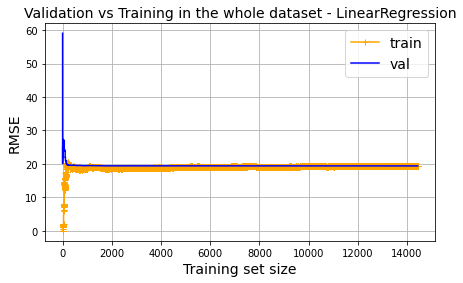

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_linerD, y_train_linerD)

plot_learning_curves_and_evaluate(lin_reg, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD )

In [102]:
#valdiation score as score
add_model_performance(regression_performance, 'LinearRegression + linear features', 19.41, 11.85)

LinearRegression Training Set RMSE: 4.40
LinearRegression Training Set MAE: 2.34
LinearRegression Validation Set RMSE: 4.58
LinearRegression Validation Set MAE: 2.41


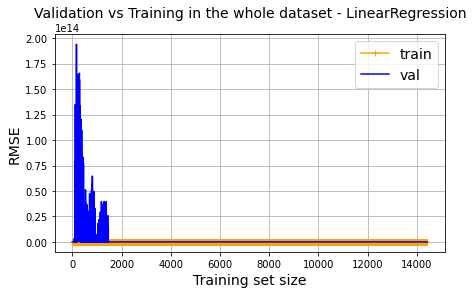

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg_AllD = LinearRegression()
lin_reg_AllD.fit(x_train_AllD, y_train_AllD)

plot_learning_curves_and_evaluate(lin_reg_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

In [103]:
add_model_performance(regression_performance, 'LinearRegression + All features', 4.58, 2.41)

LinearRegression Training Set RMSE: 6.59
LinearRegression Training Set MAE: 3.58
LinearRegression Validation Set RMSE: 6.83
LinearRegression Validation Set MAE: 3.66


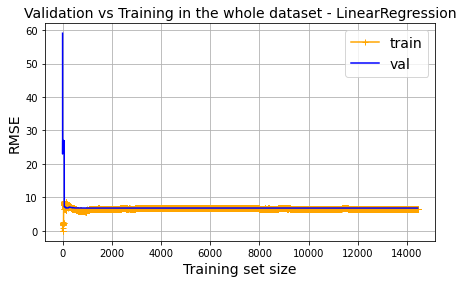

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg_RandomFD = LinearRegression()
lin_reg_RandomFD.fit(x_train_RandomFD, y_train_RandomFD)

plot_learning_curves_and_evaluate(lin_reg_RandomFD, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [104]:
add_model_performance(regression_performance, 'LinearRegression + RandomF features', 6.83, 3.66)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# pipeline with PolynomialFeatures and regression model
polypipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regression', LinearRegression())
])

# parameter grid
param_grid_poly = {
    'poly_features__degree': [1, 2, 3]  # Specify different degrees to try
}

# grid search with cross-validation
poly_reg = GridSearchCV(polypipeline, param_grid_poly, cv=5, n_jobs=-1,
                           scoring='neg_root_mean_squared_error') #root mean square error

# Fit the grid search 
poly_reg.fit(x_train_linerD, y_train_linerD)

# Get the best degree found by grid search
best_degree = poly_reg.best_params_['poly_features__degree']

print("Best degree:", best_degree)


Best degree: 3


Pipeline Training Set RMSE: 13.79
Pipeline Training Set MAE: 6.88
Pipeline Validation Set RMSE: 14.89
Pipeline Validation Set MAE: 7.23


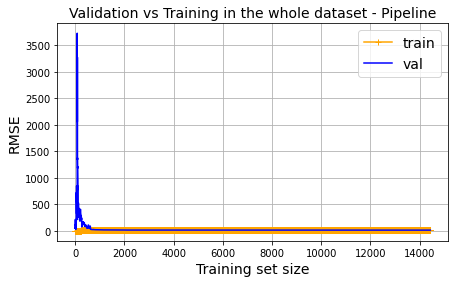

In [55]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves_and_evaluate(polynomial_regression, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD)

In [105]:
add_model_performance(regression_performance, 'polynomial regression + linear features', 14.89, 7.23)

In [14]:
x_train_RandomFD, x_val_RandomFD, y_train_RandomFD, y_val_RandomFD = train_test_split(RandomFregressot_data_train, label_train,
                                                                              test_size=0.2, random_state=10)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# pipeline with PolynomialFeatures and regression model
polypipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regression', LinearRegression())
])

# parameter grid
param_grid_poly = {
    'poly_features__degree': [1, 2, 3]  # Specify different degrees to try
}

# grid search with cross-validation
poly_reg = GridSearchCV(polypipeline, param_grid_poly, cv=5, n_jobs=-1,
                           scoring='neg_root_mean_squared_error') #root mean square error

# Fit the grid search 
poly_reg.fit(x_train_RandomFD, y_train_RandomFD)

# Get the best degree found by grid search
best_degree = poly_reg.best_params_['poly_features__degree']

print("Best degree:", best_degree)


Best degree: 3


In [33]:
polynomial_regression2 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

polynomial_regression2.fit(x_train_RandomFD, y_train_RandomFD)

evaluate_model_with_validation(polynomial_regression2, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

Pipeline Training Set RMSE: 5.25
Pipeline Training Set MAE: 2.75
Pipeline Validation Set RMSE: 5.45
Pipeline Validation Set MAE: 2.79


In [106]:
add_model_performance(regression_performance, 'polynomial regression + Random Forest features', 5.45, 2.79)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# pipeline with PolynomialFeatures and regression model
polypipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regression', LinearRegression())
])

# parameter grid
param_grid_poly = {
    'poly_features__degree': [1, 2]  # Specify different degrees to try
}

# grid search with cross-validation
poly_reg = GridSearchCV(polypipeline, param_grid_poly, cv=5, n_jobs=-1,
                           scoring='neg_root_mean_squared_error') #root mean square error

# Fit the grid search 
poly_reg.fit(x_train_AllD, y_train_AllD)

# Get the best degree found by grid search
best_degree = poly_reg.best_params_['poly_features__degree']

print("Best degree:", best_degree)


Best degree: 2


In [31]:
polynomial_regression3 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

polynomial_regression3.fit(x_train_AllD, y_train_AllD)

evaluate_model_with_validation(polynomial_regression3, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

Pipeline Training Set RMSE: 1.38
Pipeline Training Set MAE: 0.89
Pipeline Validation Set RMSE: 47666477.91
Pipeline Validation Set MAE: 793453.34


In [107]:
add_model_performance(regression_performance, 'polynomial regression + All features', 47666477.91, 793453.34)

RandomForestRegressor Training Set RMSE: 5.02
RandomForestRegressor Training Set MAE: 2.69
RandomForestRegressor Validation Set RMSE: 5.46
RandomForestRegressor Validation Set MAE: 2.80


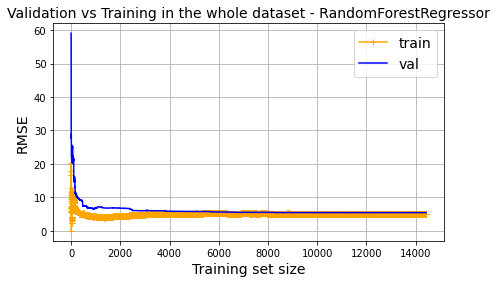

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_forest.fit(x_train_RandomFD, y_train_RandomFD)

RandomForestRegg_best_estimator = grid_search_forest.best_estimator_

plot_learning_curves_and_evaluate(RandomForestRegg_best_estimator, x_train_RandomFD, y_train_RandomFD,
                                  x_val_RandomFD, y_val_RandomFD)

In [108]:
add_model_performance(regression_performance, 'Random Forest + RandomForest features', 5.46, 2.80)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
rnd_search_forest = RandomizedSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
rnd_search_forest.fit(x_train_AllD, y_train_AllD)

RandomForestRegg_best_estimator_AllD = rnd_search_forest.best_estimator_

evaluate_model_with_validation(RandomForestRegg_best_estimator_AllD, x_train_AllD, y_train_AllD,
                                  x_val_AllD, y_val_AllD)

RandomForestRegressor Training Set RMSE: 0.05
RandomForestRegressor Training Set MAE: 0.00
RandomForestRegressor Validation Set RMSE: 1.81
RandomForestRegressor Validation Set MAE: 0.34


In [109]:
add_model_performance(regression_performance, 'Random Forest + All features', 1.81,  0.34)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
rnd_search_forest = RandomizedSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
rnd_search_forest.fit(x_train_linerD, y_train_linerD)

RandomForestRegg_best_estimator_linerD = rnd_search_forest.best_estimator_

evaluate_model_with_validation(RandomForestRegg_best_estimator_linerD, x_train_linerD, y_train_linerD,
                                  x_val_linerD, y_val_linerD)

RandomForestRegressor Training Set RMSE: 3.14
RandomForestRegressor Training Set MAE: 1.01
RandomForestRegressor Validation Set RMSE: 7.95
RandomForestRegressor Validation Set MAE: 2.36


In [110]:
add_model_performance(regression_performance, 'Random Forest + linear features', 1.81,  0.34)

In [15]:
x_train_AllD, x_val_AllD, y_train_AllD, y_val_AllD = train_test_split(scaled_alldata_train, label_train,
                                                                              test_size=0.2, random_state=10)

DecisionTreeRegressor Training Set RMSE: 5.26
DecisionTreeRegressor Training Set MAE: 2.82
DecisionTreeRegressor Validation Set RMSE: 5.61
DecisionTreeRegressor Validation Set MAE: 2.91


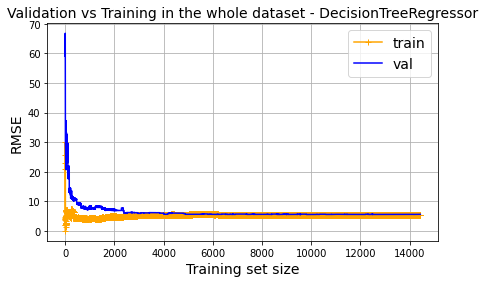

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_reg = DecisionTreeRegressor()

# Perform grid search
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=10, n_jobs=-1, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_tree.fit(x_train_RandomFD, y_train_RandomFD)

DescionTRegg_best_estimator = grid_search_tree.best_estimator_

plot_learning_curves_and_evaluate(DescionTRegg_best_estimator, x_train_RandomFD, y_train_RandomFD,
                                  x_val_RandomFD, y_val_RandomFD)

In [111]:
add_model_performance(regression_performance, 'Decision Tree + RandomForest features', 5.61, 2.91)

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_reg = DecisionTreeRegressor()

# Perform grid search
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=10, n_jobs=-1, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_tree.fit(x_train_linerD, y_train_linerD)

DescionTRegg_best_estimator_linearD = grid_search_tree.best_estimator_

evaluate_model_with_validation(DescionTRegg_best_estimator_linearD, x_train_linerD, y_train_linerD,
                                  x_val_linerD, y_val_linerD)

DecisionTreeRegressor Training Set RMSE: 11.32
DecisionTreeRegressor Training Set MAE: 4.72
DecisionTreeRegressor Validation Set RMSE: 12.43
DecisionTreeRegressor Validation Set MAE: 5.05


In [112]:
add_model_performance(regression_performance, 'Decision Tree + linear features', 12.43, 5.05)

DecisionTreeRegressor Training Set RMSE: 3.19
DecisionTreeRegressor Training Set MAE: 2.31
DecisionTreeRegressor Validation Set RMSE: 3.86
DecisionTreeRegressor Validation Set MAE: 2.44


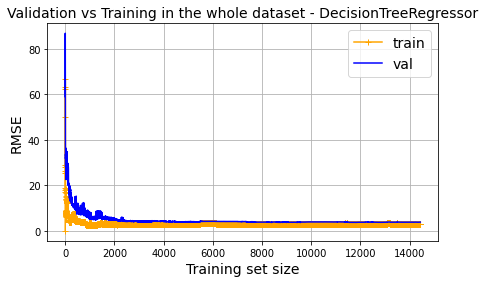

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_reg = DecisionTreeRegressor()

# Perform grid search
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=10, n_jobs=-1, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_tree.fit(x_train_AllD, y_train_AllD)

DescionTRegg_best_estimator = grid_search_tree.best_estimator_

plot_learning_curves_and_evaluate(DescionTRegg_best_estimator, x_train_AllD, y_train_AllD,
                                  x_val_AllD, y_val_AllD)

In [113]:
add_model_performance(regression_performance, 'Decision Tree + All features', 3.86, 2.44)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_reg = KNeighborsRegressor()

# Grid search
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'neg_mean_squared_error',
                           return_train_score=True)

grid_search_knn.fit(x_train_RandomFD, y_train_RandomFD)

knn_best_estimator = grid_search_knn.best_estimator_

evaluate_model_with_validation(knn_best_estimator, x_train_RandomFD, y_train_RandomFD,
                                  x_val_RandomFD, y_val_RandomFD)

KNeighborsRegressor Training Set RMSE: 5.77
KNeighborsRegressor Training Set MAE: 2.85
KNeighborsRegressor Validation Set RMSE: 6.57
KNeighborsRegressor Validation Set MAE: 3.06


In [114]:
add_model_performance(regression_performance, 'KNN + RandomForest features', 6.57, 3.06)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_reg = KNeighborsRegressor()

# Grid search
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'neg_mean_squared_error',
                           return_train_score=True)

grid_search_knn.fit(x_train_AllD, y_train_AllD)

knn_best_estimator_AllD = grid_search_knn.best_estimator_

evaluate_model_with_validation(knn_best_estimator_AllD, x_train_AllD, y_train_AllD,
                                  x_val_AllD, y_val_AllD)

KNeighborsRegressor Training Set RMSE: 0.07
KNeighborsRegressor Training Set MAE: 0.00
KNeighborsRegressor Validation Set RMSE: 3.59
KNeighborsRegressor Validation Set MAE: 1.71


In [115]:
add_model_performance(regression_performance, 'KNN + All features', 3.59, 1.71)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_reg = KNeighborsRegressor()

# Grid search
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'neg_mean_squared_error',
                           return_train_score=True)

grid_search_knn.fit(x_train_linerD, y_train_linerD)

knn_best_estimator_linearD = grid_search_knn.best_estimator_

evaluate_model_with_validation(knn_best_estimator_linearD, x_train_linerD, y_train_linerD,
                                  x_val_linerD, y_val_linerD)

KNeighborsRegressor Training Set RMSE: 4.01
KNeighborsRegressor Training Set MAE: 0.96
KNeighborsRegressor Validation Set RMSE: 8.37
KNeighborsRegressor Validation Set MAE: 2.24


In [116]:
add_model_performance(regression_performance, 'KNN + linear features', 8.37, 2.24)

XGBRegressor Training Set RMSE: 5.03
XGBRegressor Training Set MAE: 2.70
XGBRegressor Validation Set RMSE: 5.38
XGBRegressor Validation Set MAE: 2.81


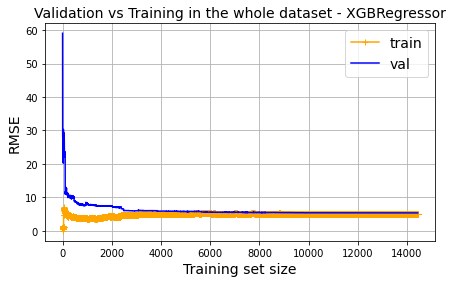

In [27]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBRegressor(random_state=42)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_xgb.fit(x_train_RandomFD, y_train_RandomFD)

xgb_best_estimator = rnd_search_xgb.best_estimator_

plot_learning_curves_and_evaluate(xgb_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [117]:
add_model_performance(regression_performance, 'XGB + RandomForest features', 5.38, 2.81)

XGBRegressor Training Set RMSE: 0.61
XGBRegressor Training Set MAE: 0.36
XGBRegressor Validation Set RMSE: 1.45
XGBRegressor Validation Set MAE: 0.55


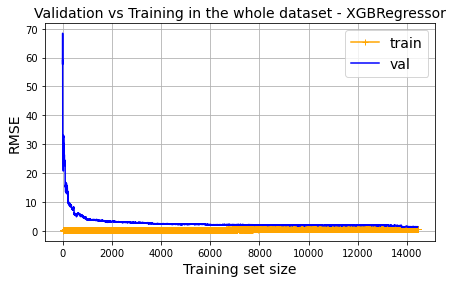

In [28]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBRegressor(random_state=42)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_xgb.fit(x_train_AllD, y_train_AllD)

xgb_best_estimator_AllD = rnd_search_xgb.best_estimator_

plot_learning_curves_and_evaluate(xgb_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

In [118]:
add_model_performance(regression_performance, 'XGB + All features', 1.45, 0.55)

In [44]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBRegressor(random_state=42)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_xgb.fit(x_train_linerD, y_train_linerD)

xgb_best_estimator_linearD = rnd_search_xgb.best_estimator_

evaluate_model_with_validation(xgb_best_estimator_linearD, x_train_linerD, y_train_linerD, x_val_linerD, y_val_linerD)

XGBRegressor Training Set RMSE: 3.29
XGBRegressor Training Set MAE: 1.57
XGBRegressor Validation Set RMSE: 7.40
XGBRegressor Validation Set MAE: 2.56


In [119]:
add_model_performance(regression_performance, 'XGB + linear features', 7.40, 2.56)

Ridge Training Set RMSE: 6.59
Ridge Training Set MAE: 3.58
Ridge Validation Set RMSE: 6.83
Ridge Validation Set MAE: 3.66


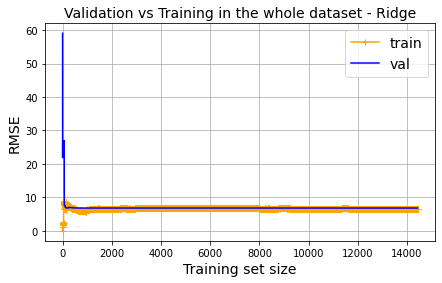

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#epsilon to avoid zero division error
epsilon = 1e-8  

param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2) + epsilon,
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg']
}


ridge_reg = Ridge(random_state=42)

# Create the GridSearchCV
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_ridge.fit(x_train_RandomFD, y_train_RandomFD)

ridge_best_estimator = grid_search_ridge.best_estimator_

plot_learning_curves_and_evaluate(ridge_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [120]:
add_model_performance(regression_performance, 'Ridge + RandomForest features', 6.83, 3.66)

Ridge Training Set RMSE: 4.40
Ridge Training Set MAE: 2.34
Ridge Validation Set RMSE: 4.58
Ridge Validation Set MAE: 2.41


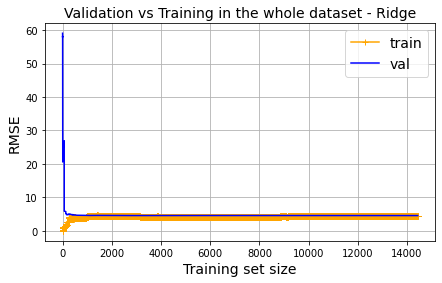

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#epsilon to avoid zero division error
epsilon = 1e-8  

param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2) + epsilon,
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg']
}


ridge_reg = Ridge(random_state=42)

# Create the GridSearchCV
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_ridge.fit(x_train_AllD, y_train_AllD)

ridge_best_estimator_AllD = grid_search_ridge.best_estimator_

plot_learning_curves_and_evaluate(ridge_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

In [121]:
add_model_performance(regression_performance, 'Ridge + All features', 4.58, 2.41)

/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Lasso Training Set RMSE: 6.61
Lasso Training Set MAE: 3.67
Lasso Validation Set RMSE: 6.83
Lasso Validation Set MAE: 3.74


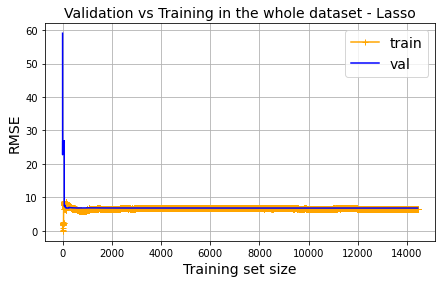

In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

epsilon = 1e-8  

param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2) + epsilon,
}

lasso_regg = Lasso(max_iter=10000, random_state=42)

# Create the GridSearchCV
grid_search_lasso = GridSearchCV(lasso_regg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_lasso.fit(x_train_RandomFD, y_train_RandomFD)

lasso_best_estimator = grid_search_lasso.best_estimator_

plot_learning_curves_and_evaluate(lasso_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [122]:
add_model_performance(regression_performance, 'Lasso + RandomForest features', 6.83, 3.74)

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

epsilon = 1e-8  

param_grid = {
    'alpha': np.arange(0.1, 5.1, 0.2) + epsilon,
}

lasso_regg = Lasso(max_iter=10000, random_state=42)

# Create the GridSearchCV
grid_search_lasso = GridSearchCV(lasso_regg, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search_lasso.fit(x_train_AllD, y_train_AllD)

lasso_best_estimator_AllD = grid_search_lasso.best_estimator_

evaluate_model_with_validation(lasso_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

Lasso Training Set RMSE: 4.44
Lasso Training Set MAE: 2.40
Lasso Validation Set RMSE: 4.60
Lasso Validation Set MAE: 2.47


In [123]:
add_model_performance(regression_performance, 'Lasso + All features', 4.60, 2.47)

/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet Training Set RMSE: 6.61
ElasticNet Training Set MAE: 3.67
ElasticNet Validation Set RMSE: 6.83
ElasticNet Validation Set MAE: 3.74


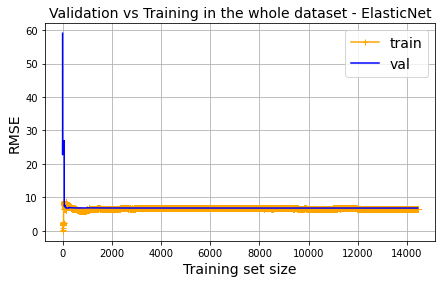

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid_elastic = {
    'alpha': np.arange(0.1, 5.1, 0.2),     # Range of alpha values
    'l1_ratio': np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
}

elastic_net = ElasticNet(random_state=42)


# Create the grid search
elastic_net_grid_search = GridSearchCV(elastic_net, param_grid_elastic, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

elastic_net_grid_search.fit(x_train_RandomFD, y_train_RandomFD)

elastic_net_best_estimator = elastic_net_grid_search.best_estimator_

plot_learning_curves_and_evaluate(elastic_net_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)

In [124]:
add_model_performance(regression_performance, 'ElasticNet + RandomForest features', 6.83, 3.74)

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid_elastic = {
    'alpha': np.arange(0.1, 5.1, 0.2),     # Range of alpha values
    'l1_ratio': np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
}

elastic_net = ElasticNet(random_state=42)


# Create the grid search
elastic_net_grid_search = GridSearchCV(elastic_net, param_grid_elastic, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

elastic_net_grid_search.fit(x_train_AllD, y_train_AllD)

elastic_net_best_estimator_AllD = elastic_net_grid_search.best_estimator_

evaluate_model_with_validation(elastic_net_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

ElasticNet Training Set RMSE: 4.47
ElasticNet Training Set MAE: 2.43
ElasticNet Validation Set RMSE: 4.62
ElasticNet Validation Set MAE: 2.50


/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.900e+03, tolerance: 5.097e+03
  model = cd_fast.enet_coordinate_descent(


In [125]:
add_model_performance(regression_performance, 'ElasticNet + All features', 4.62, 2.50)

In [36]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

#SGD (no penatly)
# hyperparameters to search
param_grid_SGD = {
    'eta0': np.arange(0.01, 1, 0.01),     # Range of eta0 values
}


SGD = SGDRegressor(random_state=42, max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty=None )

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD, param_grid_SGD, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(x_train_RandomFD, y_train_RandomFD)

SGD_best_estimator = SGD_grid_search.best_estimator_

evaluate_model_with_validation(SGD_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)
#plot_learning_curves_and_evaluate(SGD_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 6.89
SGDRegressor Training Set MAE: 2.98
SGDRegressor Validation Set RMSE: 7.16
SGDRegressor Validation Set MAE: 3.08


In [126]:
add_model_performance(regression_performance, 'SGD(No penalty) + RandomForest features', 7.16, 3.08)

In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

#SGD (no penatly)
# hyperparameters to search
param_grid_SGD = {
    'eta0': np.arange(0.01, 1, 0.01),     # Range of eta0 values
}


SGD = SGDRegressor(random_state=42, max_iter=10000, tol=1e-3, learning_rate='invscaling',penalty=None )

# Create the grid search 
SGD_grid_search = GridSearchCV(SGD, param_grid_SGD, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
                                       return_train_score=True)

SGD_grid_search.fit(x_train_AllD, y_train_AllD)

SGD_best_estimator_AllD = SGD_grid_search.best_estimator_

evaluate_model_with_validation(SGD_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
#plot_learning_curves_and_evaluate(SGD_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 7681262.04
SGDRegressor Training Set MAE: 77062.92
SGDRegressor Validation Set RMSE: 249511.88
SGDRegressor Validation Set MAE: 13073.80


In [127]:
add_model_performance(regression_performance, 'SGD(No penalty) + All features', 249511.88, 13073.80)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L1
# hyperparameters to search
param_grid_sgd_l1 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1 penalty
sgd_reg_l1 = SGDRegressor(penalty="l1", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search 
grid_search_sgd_l1 = GridSearchCV(sgd_reg_l1, param_grid_sgd_l1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l1.fit(x_train_RandomFD, y_train_RandomFD)

SGD_l1_best_estimator = grid_search_sgd_l1.best_estimator_

evaluate_model_with_validation(SGD_l1_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)
#plot_learning_curves_and_evaluate(SGD_l1_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 8.76
SGDRegressor Training Set MAE: 5.98
SGDRegressor Validation Set RMSE: 8.87
SGDRegressor Validation Set MAE: 5.94


In [128]:
add_model_performance(regression_performance, 'SGD(+L1) + RandomForest features', 8.87, 5.94)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
#SGD + L1
# hyperparameters to search
param_grid_sgd_l1 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1 penalty
sgd_reg_l1 = SGDRegressor(penalty="l1", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search 
random_search_sgd_l1 = RandomizedSearchCV(sgd_reg_l1, param_grid_sgd_l1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search_sgd_l1.fit(x_train_AllD, y_train_AllD)

SGD_l1_best_estimator_AllD = random_search_sgd_l1.best_estimator_

evaluate_model_with_validation(SGD_l1_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)

SGDRegressor Training Set RMSE: 11.72
SGDRegressor Training Set MAE: 8.69
SGDRegressor Validation Set RMSE: 11.63
SGDRegressor Validation Set MAE: 8.66


In [129]:
add_model_performance(regression_performance, 'SGD(+L1) + All features', 11.63, 8.66)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L2
# hyperparameters to search
param_grid_sgd_l2 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L2 penalty
sgd_reg_l2 = SGDRegressor(penalty="l2", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=10)

# Create the grid search
grid_search_sgd_l2 = GridSearchCV(sgd_reg_l2, param_grid_sgd_l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l2.fit(x_train_RandomFD, y_train_RandomFD)

SGD_l2_best_estimator = grid_search_sgd_l2.best_estimator_

evaluate_model_with_validation(SGD_l2_best_estimator,x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)
#plot_learning_curves_and_evaluate(SGD_l2_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 201.52
SGDRegressor Training Set MAE: 112.93
SGDRegressor Validation Set RMSE: 200.95
SGDRegressor Validation Set MAE: 111.05


In [130]:
add_model_performance(regression_performance, 'SGD(+L2) + RandomForest features', 200.95, 111.05)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L2
# hyperparameters to search
param_grid_sgd_l2 = {
    'alpha': np.arange(0.1, 5.1, 0.1),  # Range of alpha values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L2 penalty
sgd_reg_l2 = SGDRegressor(penalty="l2", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=10)

# Create the grid search
grid_search_sgd_l2 = GridSearchCV(sgd_reg_l2, param_grid_sgd_l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l2.fit(x_train_AllD, y_train_AllD)

SGD_l2_best_estimator_AllD = grid_search_sgd_l2.best_estimator_

evaluate_model_with_validation(SGD_l2_best_estimator_AllD,x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
#plot_learning_curves_and_evaluate(SGD_l2_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 12.45
SGDRegressor Training Set MAE: 9.24
SGDRegressor Validation Set RMSE: 12.28
SGDRegressor Validation Set MAE: 9.17


In [131]:
add_model_performance(regression_performance, 'SGD(+L2) + All features', 12.28, 9.17)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L1L2
# hyperparameters to search
param_grid_sgd_l1l2 = {
    'alpha': np.arange(0.1, 1.1, 0.1),  # Range of alpha values
    'l1_ratio' :  np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1L2 penalty
sgd_reg_l1l2 = SGDRegressor(penalty="elasticnet", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search
grid_search_sgd_l1l2 = GridSearchCV(sgd_reg_l1l2, param_grid_sgd_l1l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l1l2.fit(x_train_RandomFD, y_train_RandomFD)

SGD_L1l2_best_estimator = grid_search_sgd_l1l2.best_estimator_

evaluate_model_with_validation(SGD_L1l2_best_estimator, x_train_RandomFD, y_train_RandomFD, x_val_RandomFD, y_val_RandomFD)
#plot_learning_curves_and_evaluate(SGD_L1l2_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 8.76
SGDRegressor Training Set MAE: 5.98
SGDRegressor Validation Set RMSE: 8.87
SGDRegressor Validation Set MAE: 5.94


In [133]:
add_model_performance(regression_performance, 'SGD(+L1L2) + RandomForest features', 8.87, 5.94)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#SGD + L1L2
# hyperparameters to search
param_grid_sgd_l1l2 = {
    'alpha': np.arange(0.1, 1.1, 0.1),  # Range of alpha values
    'l1_ratio' :  np.arange(0.1, 1.1, 0.1),  # Range of l1_ratio values
    'eta0': np.arange(0.01, 1, 0.01)     # Range of eta0 values
}

# SGDRegressor with L1L2 penalty
sgd_reg_l1l2 = SGDRegressor(penalty="elasticnet", max_iter=10000, early_stopping=True, learning_rate='invscaling',
                           n_iter_no_change=10, tol=1e-3, random_state=42)

# Create the grid search
grid_search_sgd_l1l2 = GridSearchCV(sgd_reg_l1l2, param_grid_sgd_l1l2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_sgd_l1l2.fit(x_train_AllD, y_train_AllD)

SGD_L1l2_best_estimator_AllD = grid_search_sgd_l1l2.best_estimator_

evaluate_model_with_validation(SGD_L1l2_best_estimator_AllD, x_train_AllD, y_train_AllD, x_val_AllD, y_val_AllD)
#plot_learning_curves_and_evaluate(SGD_L1l2_best_estimator, RandomFregressot_data_train, label_train.values.ravel())

SGDRegressor Training Set RMSE: 8.41
SGDRegressor Training Set MAE: 5.85
SGDRegressor Validation Set RMSE: 8.36
SGDRegressor Validation Set MAE: 5.89


In [134]:
add_model_performance(regression_performance, 'SGD(+L1L2) + All features', 8.36, 5.89)

In [56]:
# NN libraries
import tensorflow as tf
from tensorflow import keras
import random
from tensorflow.keras import regularizers
import keras_tuner as kt

x_train, x_val, y_train, y_val = train_test_split(
    RandomFregressot_data_train, label_train.values.ravel(), test_size=0.2, random_state=20
)

In [50]:
# Find the input layer size
x_train_RandomFD.shape

(14435, 3)

In [52]:
x_train_AllD.shape

(14435, 42)

In [58]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_ForestFea", seed=42)

random_search_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 02m 16s]
val_mean_absolute_error: 94.3412857055664

Best val_mean_absolute_error So Far: 7.022698402404785
Total elapsed time: 00h 07m 48s


In [59]:
(random_search_tuner.oracle.get_best_trials(num_trials=1)[0]).summary()

Trial 3 summary
Hyperparameters:
n_hidden: 0
n_neurons: 150
learning_rate: 0.00028078309037793175
optimizer: Adam
activation: elu
Score: 7.022698402404785


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8883 - mean_absolute_error: 6.8883 - val_loss: 7.0056 - val_mean_absolute_error: 7.0056
Epoch 2/100
452/452 [==============================] - 1s 1ms/step - loss: 6.8712 - mean_absolute_error: 6.8712 - val_loss: 6.9948 - val_mean_absolute_error: 6.9948
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8543 - mean_absolute_error: 6.8543 - val_loss: 6.9704 - val_mean_absolute_error: 6.9704
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8377 - mean_absolute_error: 6.8377 - val_loss: 6.9523 - val_mean_absolute_error: 6.9523
Epoch 5/100
452/452 [==============================] - 1s 1ms/step - loss: 6.8208 - mean_absolute_error: 6.8208 - val_loss: 6.9378 - val_mean_absolute_error: 6.9378
Epoch 6/100
452/452 [==============================] - 1s 1ms/step - loss: 6.8039 - mean_absolute_error: 6.8039 - val_loss: 6.9178 - val_mean_absolute_error: 6.9178
Epoch 7/10

452/452 [==============================] - 1s 2ms/step - loss: 5.2270 - mean_absolute_error: 5.2270 - val_loss: 5.3077 - val_mean_absolute_error: 5.3077
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 5.2112 - mean_absolute_error: 5.2112 - val_loss: 5.2898 - val_mean_absolute_error: 5.2898


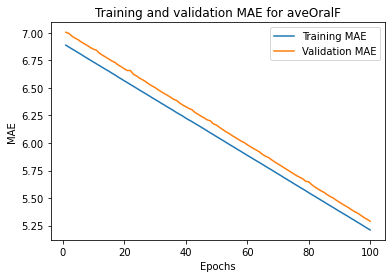

In [62]:
Forest_regg_data_random_search = random_search_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_random_search.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [135]:
add_model_performance(regression_performance, 'NN + random_search (No regularizer) + RandomForest features', 'NA', 5.28)

In [63]:
#Save the model
Forest_regg_data_random_search.save("Forest_regg_data_random_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_AllFea", seed=42)

random_search_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 02m 23s]
val_mean_absolute_error: 91.79878997802734

Best val_mean_absolute_error So Far: 1.8533740043640137
Total elapsed time: 00h 08m 53s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 1.9041 - mean_absolute_error: 1.9041 - val_loss: 1.9293 - val_mean_absolute_error: 1.9293
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8252 - mean_absolute_error: 1.8252 - val_loss: 2.0057 - val_mean_absolute_error: 2.0057
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8423 - mean_absolute_error: 1.8423 - val_loss: 1.8998 - val_mean_absolute_error: 1.8998
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 1.7812 - mean_absolute_error: 1.7812 - val_loss: 2.7206 - val_mean_absolute_error: 2.7206
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8503 - mean_absolute_error: 1.8503 - val_loss: 1.7670 - val_mean_absolute_error: 1.7670
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 1.7232 - mean_absolute_error: 1.7232 - val_loss: 1.6914 - val_mean_absolute_error: 1.6914
Epoch 7/10

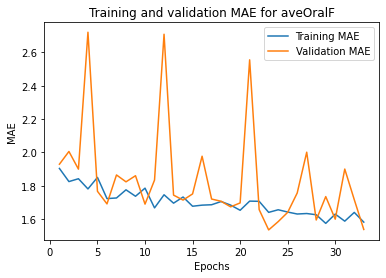

In [66]:
AllF_regg_data_random_search = random_search_tuner.get_best_models(num_models=1)[0]

history = AllF_regg_data_random_search.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [136]:
add_model_performance(regression_performance, 'NN + random_search (No regularizer) + All features', 'NA', 1.53)

In [67]:
#Save the model
AllF_regg_data_random_search.save("AllF_regg_data_random_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l1_strength = hp.Choice('l1_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l1(l1_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_ForestFea_L1", seed=42)

random_search_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 16s]
val_mean_absolute_error: 12.749348640441895

Best val_mean_absolute_error So Far: 12.749348640441895
Total elapsed time: 00h 05m 03s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 12.5478 - mean_absolute_error: 12.5478 - val_loss: 12.2493 - val_mean_absolute_error: 12.2493
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 12.0280 - mean_absolute_error: 12.0280 - val_loss: 11.7494 - val_mean_absolute_error: 11.7494
Epoch 3/100
452/452 [==============================] - 1s 1ms/step - loss: 11.5252 - mean_absolute_error: 11.5252 - val_loss: 11.2500 - val_mean_absolute_error: 11.2500
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 11.0149 - mean_absolute_error: 11.0149 - val_loss: 10.7746 - val_mean_absolute_error: 10.7746
Epoch 5/100
452/452 [==============================] - 1s 1ms/step - loss: 10.5407 - mean_absolute_error: 10.5407 - val_loss: 10.3085 - val_mean_absolute_error: 10.3085
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 10.0692 - mean_absolute_error: 10.0692 - val_loss: 9.8724 - val_mean_absolute_er

452/452 [==============================] - 1s 2ms/step - loss: 6.9233 - mean_absolute_error: 6.9233 - val_loss: 7.0497 - val_mean_absolute_error: 7.0497
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 6.9186 - mean_absolute_error: 6.9186 - val_loss: 7.0437 - val_mean_absolute_error: 7.0437


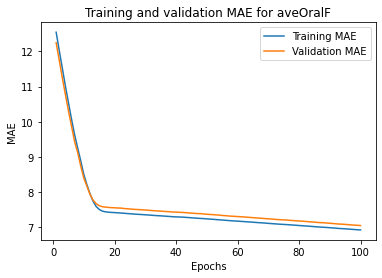

In [69]:
Forest_regg_data_random_search_l1 = random_search_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_random_search_l1.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [137]:
add_model_performance(regression_performance, 'NN + random_search+L1 + RandomForest features', 'NA', 7.04)

In [70]:
#Save the model
Forest_regg_data_random_search_l1.save("Forest_regg_data_random_search_l1.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l1_strength = hp.Choice('l1_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l1(l1_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_AllFea_L1", seed=42)

random_search_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 23s]
val_mean_absolute_error: 181.22512817382812

Best val_mean_absolute_error So Far: 1.4943842887878418
Total elapsed time: 00h 05m 49s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 2.5659 - mean_absolute_error: 1.6087 - val_loss: 2.5841 - val_mean_absolute_error: 1.6284
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5997 - mean_absolute_error: 1.6451 - val_loss: 2.7136 - val_mean_absolute_error: 1.7604
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5578 - mean_absolute_error: 1.6059 - val_loss: 2.5758 - val_mean_absolute_error: 1.6255
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5134 - mean_absolute_error: 1.5644 - val_loss: 2.5579 - val_mean_absolute_error: 1.6107
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5379 - mean_absolute_error: 1.5918 - val_loss: 2.4782 - val_mean_absolute_error: 1.5337
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 2.5132 - mean_absolute_error: 1.5699 - val_loss: 2.5066 - val_mean_absolute_error: 1.5639
Epoch 7/10

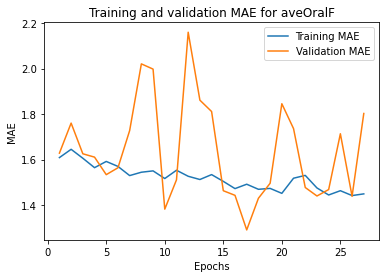

In [72]:
AllF_regg_data_random_search_l1 = random_search_tuner.get_best_models(num_models=1)[0]

history = AllF_regg_data_random_search_l1.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [138]:
add_model_performance(regression_performance, 'NN + random_search+L1 + All features', 'NA', 1.80)

In [73]:
#Save the model
AllF_regg_data_random_search_l1.save("AllF_regg_data_random_search_l1.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l2_strength = hp.Choice('l2_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l2(l2_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_ForestFea_L2", seed=42)

random_search_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 13s]
val_mean_absolute_error: 12.749348640441895

Best val_mean_absolute_error So Far: 12.749348640441895
Total elapsed time: 00h 04m 53s


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 12.5478 - mean_absolute_error: 12.5478 - val_loss: 12.2493 - val_mean_absolute_error: 12.2493
Epoch 2/100
452/452 [==============================] - 1s 1ms/step - loss: 12.0280 - mean_absolute_error: 12.0280 - val_loss: 11.7494 - val_mean_absolute_error: 11.7494
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 11.5252 - mean_absolute_error: 11.5252 - val_loss: 11.2500 - val_mean_absolute_error: 11.2500
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 11.0149 - mean_absolute_error: 11.0149 - val_loss: 10.7746 - val_mean_absolute_error: 10.7746
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 10.5407 - mean_absolute_error: 10.5407 - val_loss: 10.3085 - val_mean_absolute_error: 10.3085
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 10.0692 - mean_absolute_error: 10.0692 - val_loss: 9.8724 - val_mean_absolute_er

452/452 [==============================] - 1s 2ms/step - loss: 6.9233 - mean_absolute_error: 6.9233 - val_loss: 7.0497 - val_mean_absolute_error: 7.0497
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 6.9186 - mean_absolute_error: 6.9186 - val_loss: 7.0437 - val_mean_absolute_error: 7.0437


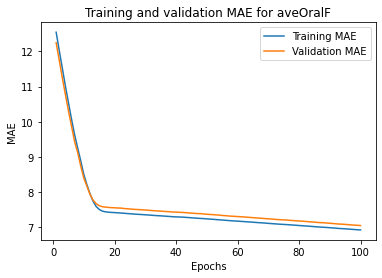

In [76]:
Forest_regg_data_random_search_l2 = random_search_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_random_search_l2.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [139]:
add_model_performance(regression_performance, 'NN + random_search+L2 + RandomForest features', 'NA', 7.04)

In [77]:
#Save the model
Forest_regg_data_random_search_l2.save("Forest_regg_data_random_search_l2.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
from tensorflow.keras import regularizers

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L2 regularization strength
    l2_strength = hp.Choice('l2_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation, 
                                  kernel_regularizer=regularizers.l2(l2_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_AllFea_L2", seed=42)

random_search_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 16s]
val_mean_absolute_error: 181.22512817382812

Best val_mean_absolute_error So Far: 1.3448199033737183
Total elapsed time: 00h 06m 35s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 2.2696 - mean_absolute_error: 1.3870 - val_loss: 2.4756 - val_mean_absolute_error: 1.5971
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2642 - mean_absolute_error: 1.3889 - val_loss: 2.2983 - val_mean_absolute_error: 1.4254
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2536 - mean_absolute_error: 1.3836 - val_loss: 2.4222 - val_mean_absolute_error: 1.5553
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2725 - mean_absolute_error: 1.4087 - val_loss: 2.3775 - val_mean_absolute_error: 1.5168
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2026 - mean_absolute_error: 1.3462 - val_loss: 2.3365 - val_mean_absolute_error: 1.4840
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 2.2724 - mean_absolute_error: 1.4221 - val_loss: 2.5461 - val_mean_absolute_error: 1.6991
Epoch 7/10

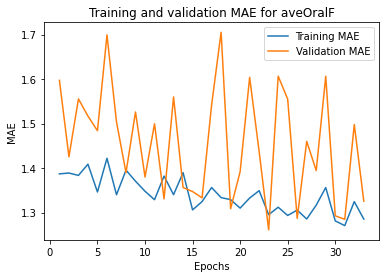

In [79]:
AllD_regg_data_random_search_l2 = random_search_tuner.get_best_models(num_models=1)[0]

history = AllD_regg_data_random_search_l2.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [140]:
add_model_performance(regression_performance, 'NN + random_search+L2 + All features', 'NA', 1.32)

In [80]:
#Save the model
AllD_regg_data_random_search_l2.save("AllD_regg_data_random_search_l2.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
import keras_tuner as kt
import tensorflow as tf
import random
from tensorflow.keras import regularizers

tf.keras.backend.clear_session()

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation="relu")(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)  # Dropout layer for regularization

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation="relu")(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_ForestFea_Dtopout", seed=42)

random_search_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 18s]
val_mean_absolute_error: 77.09838104248047

Best val_mean_absolute_error So Far: 7.877574443817139
Total elapsed time: 00h 05m 13s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 40.4241 - mean_absolute_error: 40.4241 - val_loss: 22.1152 - val_mean_absolute_error: 22.1152
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 40.3572 - mean_absolute_error: 40.3572 - val_loss: 16.9788 - val_mean_absolute_error: 16.9788
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 40.0661 - mean_absolute_error: 40.0661 - val_loss: 17.5684 - val_mean_absolute_error: 17.5684
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 39.6692 - mean_absolute_error: 39.6692 - val_loss: 23.7896 - val_mean_absolute_error: 23.7896
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 39.2994 - mean_absolute_error: 39.2994 - val_loss: 19.3960 - val_mean_absolute_error: 19.3960
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 39.1890 - mean_absolute_error: 39.1890 - val_loss: 15.6713 - val_mean_absolute_e

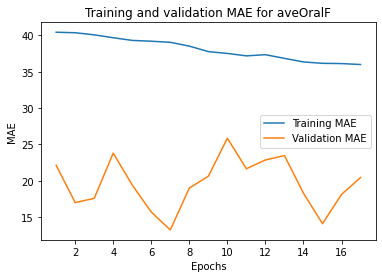

In [83]:
Forest_regg_data_random_search_DropOut = random_search_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_random_search_DropOut.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [141]:
add_model_performance(regression_performance, 'NN + random_search+DropOut + RandomForest features', 'NA', 20.42)

In [84]:
#Save the model
Forest_regg_data_random_search_DropOut.save("Forest_regg_data_random_search_DropOut.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [85]:
import keras_tuner as kt
import tensorflow as tf
import random
from tensorflow.keras import regularizers

tf.keras.backend.clear_session()

# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation="relu")(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)  # Dropout layer for regularization

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation="relu")(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_mean_absolute_error", max_trials=5, overwrite=True,
    directory="regression_1", project_name="my_rnd_search_Reg_AllFea_Dtopout", seed=42)

random_search_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)],
                          verbose=1)


Trial 5 Complete [00h 01m 22s]
val_mean_absolute_error: 177.29104614257812

Best val_mean_absolute_error So Far: 6.94419002532959
Total elapsed time: 00h 04m 34s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 38.7181 - mean_absolute_error: 38.7181 - val_loss: 19.4151 - val_mean_absolute_error: 19.4151
Epoch 2/100
452/452 [==============================] - 1s 3ms/step - loss: 36.7965 - mean_absolute_error: 36.7965 - val_loss: 20.3135 - val_mean_absolute_error: 20.3135
Epoch 3/100
452/452 [==============================] - 1s 3ms/step - loss: 35.1722 - mean_absolute_error: 35.1722 - val_loss: 22.4517 - val_mean_absolute_error: 22.4517
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 34.5218 - mean_absolute_error: 34.5218 - val_loss: 10.9397 - val_mean_absolute_error: 10.9397
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 33.7799 - mean_absolute_error: 33.7799 - val_loss: 13.4105 - val_mean_absolute_error: 13.4105
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 33.7227 - mean_absolute_error: 33.7227 - val_loss: 23.7516 - val_mean_absolute_e

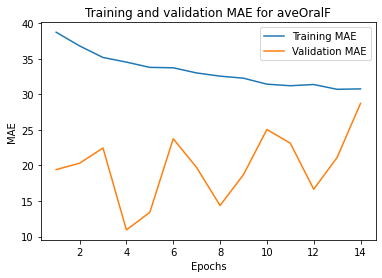

In [86]:
AllD_regg_data_random_search_DropOut = random_search_tuner.get_best_models(num_models=1)[0]

history = AllD_regg_data_random_search_DropOut.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [142]:
add_model_performance(regression_performance, 'NN + random_search+DropOut + All features', 'NA', 28.72)

In [87]:
#Save the model
AllD_regg_data_random_search_DropOut.save("AllD_regg_data_random_search_DropOut.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [88]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

hyperband_tuner = kt.Hyperband(
    build_model, objective="val_mean_absolute_error", max_epochs=100,
    factor=3, directory="regression_1", project_name="my_hyperband_Reg_ForestFea", seed=42)

hyperband_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                       validation_data=(x_val_RandomFD, y_val_RandomFD),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])


Reloading Tuner from regression_1/my_hyperband_Reg_ForestFea/tuner0.json


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3252 - mean_absolute_error: 2.3252 - val_loss: 2.3166 - val_mean_absolute_error: 2.3166
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3298 - mean_absolute_error: 2.3298 - val_loss: 2.3535 - val_mean_absolute_error: 2.3535
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3415 - mean_absolute_error: 2.3415 - val_loss: 2.4126 - val_mean_absolute_error: 2.4126
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3331 - mean_absolute_error: 2.3331 - val_loss: 2.4017 - val_mean_absolute_error: 2.4017
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3297 - mean_absolute_error: 2.3297 - val_loss: 2.3316 - val_mean_absolute_error: 2.3316
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 2.3348 - mean_absolute_error: 2.3348 - val_loss: 2.3175 - val_mean_absolute_error: 2.3175
Epoch 7/10

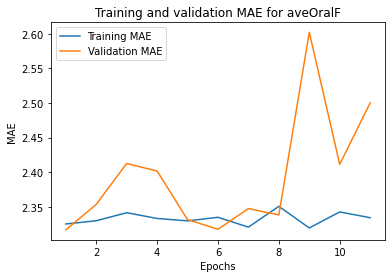

In [89]:
Forest_regg_data_hyper_search = hyperband_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_hyper_search.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [143]:
add_model_performance(regression_performance, 'NN + hyperband_opt + RandomForest features', 'NA', 2.50)

In [90]:
#Save the model
Forest_regg_data_hyper_search.save("Forest_regg_data_hyper_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

hyperband_tuner = kt.Hyperband(
    build_model, objective="val_mean_absolute_error", max_epochs=100,
    factor=3, directory="regression_1", project_name="my_hyperband_Reg_AllFea", seed=42)

hyperband_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                       validation_data=(x_val_AllD, y_val_AllD),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])


Trial 254 Complete [00h 01m 27s]
val_mean_absolute_error: 155.06080627441406

Best val_mean_absolute_error So Far: 1.0258705615997314
Total elapsed time: 00h 48m 56s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 1.4255 - mean_absolute_error: 1.4255 - val_loss: 1.1819 - val_mean_absolute_error: 1.1819
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 1.2002 - mean_absolute_error: 1.2002 - val_loss: 1.3719 - val_mean_absolute_error: 1.3719
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 1.3379 - mean_absolute_error: 1.3379 - val_loss: 2.3276 - val_mean_absolute_error: 2.3276
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 1.2950 - mean_absolute_error: 1.2950 - val_loss: 1.2758 - val_mean_absolute_error: 1.2758
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 1.2440 - mean_absolute_error: 1.2440 - val_loss: 1.9436 - val_mean_absolute_error: 1.9436
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 1.2388 - mean_absolute_error: 1.2388 - val_loss: 0.9926 - val_mean_absolute_error: 0.9926
Epoch 7/10

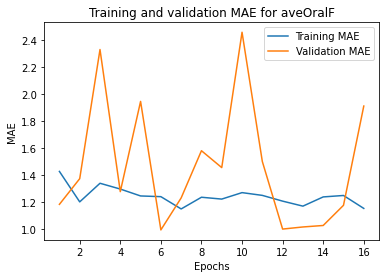

In [92]:
AllD_regg_data_hyper_search = hyperband_tuner.get_best_models(num_models=1)[0]

history = AllD_regg_data_hyper_search.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [144]:
add_model_performance(regression_performance, 'NN + hyperband_opt + All features', 'NA', 1.90)

In [93]:
#Save the model
AllD_regg_data_hyper_search.save("AllD_regg_data_hyper_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [94]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(3,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

bayesian_opt_tuner = kt.BayesianOptimization(
    build_model, objective="val_mean_absolute_error", max_trials=5,
    directory="regression_1", project_name="my_bayesian_opt_Reg_ForestFea", seed=42)


bayesian_opt_tuner.search(x_train_RandomFD, y_train_RandomFD, epochs=100,
                           validation_data=(x_val_RandomFD, y_val_RandomFD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])



Reloading Tuner from regression_1/my_bayesian_opt_Reg_ForestFea/tuner0.json


Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8868 - mean_absolute_error: 6.8868 - val_loss: 7.0040 - val_mean_absolute_error: 7.0040
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8693 - mean_absolute_error: 6.8693 - val_loss: 6.9929 - val_mean_absolute_error: 6.9929
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8522 - mean_absolute_error: 6.8522 - val_loss: 6.9682 - val_mean_absolute_error: 6.9682
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8355 - mean_absolute_error: 6.8355 - val_loss: 6.9500 - val_mean_absolute_error: 6.9500
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8186 - mean_absolute_error: 6.8186 - val_loss: 6.9354 - val_mean_absolute_error: 6.9354
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 6.8015 - mean_absolute_error: 6.8015 - val_loss: 6.9154 - val_mean_absolute_error: 6.9154
Epoch 7/10

452/452 [==============================] - 1s 2ms/step - loss: 5.2246 - mean_absolute_error: 5.2246 - val_loss: 5.3053 - val_mean_absolute_error: 5.3053
Epoch 100/100
452/452 [==============================] - 1s 2ms/step - loss: 5.2089 - mean_absolute_error: 5.2089 - val_loss: 5.2875 - val_mean_absolute_error: 5.2875


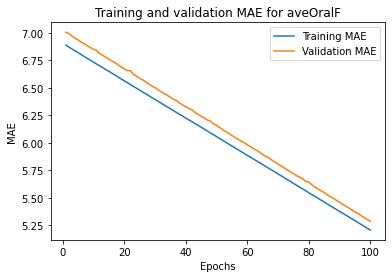

In [95]:
Forest_regg_data_bayesian_search = bayesian_opt_tuner.get_best_models(num_models=1)[0]

history = Forest_regg_data_bayesian_search.fit(x_train_RandomFD, y_train_RandomFD, epochs=100, 
                validation_data=(x_val_RandomFD, y_val_RandomFD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [145]:
add_model_performance(regression_performance, 'NN + bayesian_opt + RandomForest features', 'NA', 5.28)

In [96]:
#Save the model
Forest_regg_data_bayesian_search.save("Forest_regg_data_bayesian_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'elu', 'selu']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(42,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiling the model
    model.compile(loss="mean_absolute_error", optimizer=optimizer,
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])
    
    return model

bayesian_opt_tuner = kt.BayesianOptimization(
    build_model, objective="val_mean_absolute_error", max_trials=5,
    directory="regression_1", project_name="my_bayesian_opt_Reg_AllFea", seed=42)


bayesian_opt_tuner.search(x_train_AllD, y_train_AllD, epochs=100,
                           validation_data=(x_val_AllD, y_val_AllD),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])



Trial 5 Complete [00h 02m 09s]
val_mean_absolute_error: 91.79878997802734

Best val_mean_absolute_error So Far: 1.8533740043640137
Total elapsed time: 00h 07m 55s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 1.9041 - mean_absolute_error: 1.9041 - val_loss: 1.9293 - val_mean_absolute_error: 1.9293
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8252 - mean_absolute_error: 1.8252 - val_loss: 2.0057 - val_mean_absolute_error: 2.0057
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8423 - mean_absolute_error: 1.8423 - val_loss: 1.8998 - val_mean_absolute_error: 1.8998
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 1.7812 - mean_absolute_error: 1.7812 - val_loss: 2.7206 - val_mean_absolute_error: 2.7206
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 1.8503 - mean_absolute_error: 1.8503 - val_loss: 1.7670 - val_mean_absolute_error: 1.7670
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 1.7232 - mean_absolute_error: 1.7232 - val_loss: 1.6914 - val_mean_absolute_error: 1.6914
Epoch 7/10

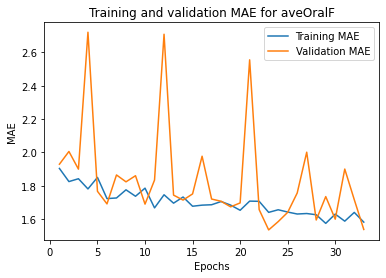

In [98]:
AllD_regg_data_bayesian_search = bayesian_opt_tuner.get_best_models(num_models=1)[0]

history = AllD_regg_data_bayesian_search.fit(x_train_AllD, y_train_AllD, epochs=100, 
                validation_data=(x_val_AllD, y_val_AllD),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)])

# Extract MAE history
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
epochs = range(1, len(mae) + 1)

# Plotting MAE
plt.plot(epochs, mae, label="Training MAE")
plt.plot(epochs, val_mae, label="Validation MAE")
plt.title("Training and validation MAE for aveOralF")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [146]:
add_model_performance(regression_performance, 'NN + bayesian_opt + All features', 'NA', 1.53)

In [99]:
#Save the model
AllD_regg_data_bayesian_search.save("AllD_regg_data_bayesian_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [147]:
# regression results dataframe checkpoint save
regression_performance.to_csv('regression_performance.csv', index=False)

In [148]:
regression_performance = pd.read_csv('regression_performance.csv')

In [149]:
sorted_df_regression = regression_performance.sort_values(by='MAE')
sorted_df_regression.head(6)

,Model,RMSE,MAE
7,Random Forest + All features,1.81,0.34
8,Random Forest + linear features,1.81,0.34
16,XGB + All features,1.45,0.55
37,NN + random_search+L2 + All features,NaN,1.32
43,NN + bayesian_opt + All features,NaN,1.53
33,NN + random_search (No regularizer) + All feat...,NaN,1.53


In [161]:
x_test_AllD = scaled_alldata_test
y_test_AllD = label_test

y_test_predict = RandomForestRegg_best_estimator_AllD.predict(x_test_AllD)

test_rmse = np.sqrt(mean_squared_error(y_test_AllD, y_test_predict))
test_mae = mean_absolute_error(y_test_AllD, y_test_predict)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Test RMSE: 2.13042151078907
Test MAE: 0.34853871158392474


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the saved model
loaded_model = tf.keras.models.load_model("Forest_regg_data_hyper_search.h5")

x_test = RandomFregressot_data_test
y_test= label_test.values.ravel()


# Evaluate the model on the test set
test_mae = loaded_model.evaluate(x_test, y_test)

print("Test MAE:", test_mae)



In [147]:
# classification

# #

In [283]:
Classification_dataset = Full_dataset3.copy()
Classification_dataset['CO2 Emission Class'] = Classification_dataset['CO2 Emission Class'].replace('low', 'medium')
Classification_dataset['CO2 Emission Class'] = Classification_dataset['CO2 Emission Class'].replace('medium', 'acceptable')
Classification_dataset['CO2 Emission Class'] = Classification_dataset['CO2 Emission Class'].replace('high', 'unacceptable')


In [284]:
Classification_dataset['CO2 Emission Class'].value_counts()

CO2 Emission Class
acceptable      13269
unacceptable     9287
Name: count, dtype: int64

In [364]:
import pandas as pd

# Assuming Classification_dataset is your DataFrame
# First, identify the indices of the 'acceptable' class
acceptable_indices = Classification_dataset[Classification_dataset['CO2 Emission Class'] == 'acceptable'].index

# Randomly select a subset of indices from the 'acceptable' class
import random
random_acceptable_indices = random.sample(list(acceptable_indices), len(Classification_dataset[Classification_dataset['CO2 Emission Class'] == 'unacceptable']))

# Keep only the selected subset of 'acceptable' data and all 'unacceptable' data
balanced_indices = random_acceptable_indices + list(Classification_dataset[Classification_dataset['CO2 Emission Class'] == 'unacceptable'].index)
balanced_data = Classification_dataset.loc[balanced_indices]

# Now, balanced_data contains an equal number of data points for both classes
balanced_data['CO2 Emission Class'].value_counts()


CO2 Emission Class
acceptable      9287
unacceptable    9287
Name: count, dtype: int64

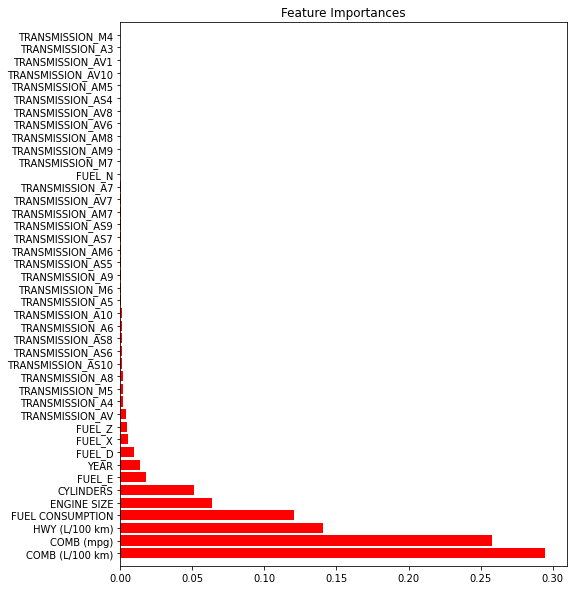

In [285]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Selecting only numeric columns from the dataset
numeric_data2 = Classification_dataset.select_dtypes(include=['number'])

X = numeric_data2.drop(['EMISSIONS', 'CO2 Emission Class_high', 'CO2 Emission Class_low',
                       'CO2 Emission Class_medium', 'Unnamed: 0'], axis=1)
y = numeric_data2[['CO2 Emission Class_high', 'CO2 Emission Class_low', 'CO2 Emission Class_medium']]


# Train a RandomForestClassifier model
rfC = RandomForestClassifier()
rfC.fit(X, y)

# Plot feature importances
importances = rfC.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 10))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")  # Swap x and y axis
plt.yticks(range(X.shape[1]), X.columns[indices])  # Set y-axis ticks as feature names
plt.ylim([-1, X.shape[1]])  # Set y-axis limit
plt.show()


In [286]:
from sklearn.model_selection import StratifiedShuffleSplit

features_classifier = Classification_dataset.drop(["Unnamed: 0", "EMISSIONS"], axis=1)
target_classifier = Classification_dataset["CO2 Emission Class"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(features_classifier, target_classifier):
    stratified_train_classifier = features_classifier.loc[train_index]
    stratified_test_classifier = features_classifier.loc[test_index]

In [345]:
RandomFClassifier_data_train = stratified_train_classifier[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)", "CYLINDERS", "ENGINE SIZE",
                                                "FUEL_E"]]
RandomFClassifier_data_test = stratified_test_classifier[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)", "CYLINDERS", "ENGINE SIZE",
                                                "FUEL_E"]]

All_data_Classifier_train = (stratified_train_classifier.drop(["CO2 Emission Class",
                                    'CO2 Emission Class_high', 'CO2 Emission Class_low', 
                                                              'CO2 Emission Class_medium'] , axis=1)).select_dtypes(include=['number'])
All_data_Classifier_test = (stratified_test_classifier.drop(["CO2 Emission Class",
                                    'CO2 Emission Class_high', 'CO2 Emission Class_low', 
                                                              'CO2 Emission Class_medium'] , axis=1)).select_dtypes(include=['number'])


In [389]:
#test
RandomFClassifier_data = balanced_data[["COMB (L/100 km)", "COMB (mpg)"]]

All_data_Classifier = (balanced_data.drop(["CO2 Emission Class",
                                    'CO2 Emission Class_high', 'CO2 Emission Class_low', 
                                                              'CO2 Emission Class_medium'] , axis=1)).select_dtypes(include=['number'])


In [390]:
from sklearn.preprocessing import LabelEncoder
#test
# Assuming `emission_cat_train` and `emission_cat_test` are your label arrays
# and you have already imported numpy

# Initialize LabelEncoder
label_encoder = LabelEncoder()

emission_cat = balanced_data[["CO2 Emission Class"]]

# Assuming `emission_cat_train` and `emission_cat_test` are numpy arrays
label_encoded = label_encoder.fit_transform(emission_cat_train.squeeze())

# Get the categories after encoding
categories = label_encoder.classes_

# Print the categories and their corresponding indices
for i, label in enumerate(categories):
    print(f"Index {i}: {label}")


Index 0: acceptable
Index 1: unacceptable


In [391]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_RandomFClass = scaler.fit_transform(RandomFClassifier_data)

scaled_AllDClass = scaler.fit_transform(All_data_Classifier)


In [392]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_RandomFClass,
                                                label_encoded, stratify=label_encoded, test_size=0.2, random_state=10)


In [393]:
x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(x_train,
                                                y_train, stratify=y_train, test_size=0.2, random_state=10)

In [409]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # Limiting the range of hyperparameters
    {'n_estimators': [10, 20, 30], 
     'max_features': [2, 4, 6, 8],  # Restricting the number of features to consider
     'max_depth': [2, 3],  # Allowing for some depth but not too deep
     'min_samples_split' : [3, 4, 5, 6],
     'min_samples_leaf' : [3, 4, 5, 6]
    }
]

forest_class = RandomForestClassifier(random_state=10)

grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_macro', return_train_score=True)

grid_search_forest.fit(x_train_1, y_train_1)

RandomForestClass_best_estimator = grid_search_forest.best_estimator_

grid_search_forest.best_params_

{'max_depth': 2,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 10}

In [410]:
from sklearn.metrics import classification_report

# Predict labels for validation set
y_val_pred = RandomForestClass_best_estimator.predict(x_val_1)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_1, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1486
           1       0.97      0.96      0.97      1486

    accuracy                           0.97      2972
   macro avg       0.97      0.97      0.97      2972
weighted avg       0.97      0.97      0.97      2972



In [413]:
from sklearn.metrics import classification_report

# Predict labels for validation set
y_test_pred = RandomForestClass_best_estimator.predict(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1857
           1       0.97      0.96      0.96      1858

    accuracy                           0.97      3715
   macro avg       0.97      0.97      0.97      3715
weighted avg       0.97      0.97      0.97      3715



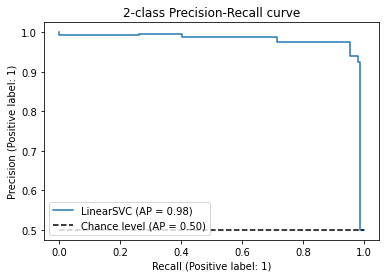

In [414]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    RandomForestClass_best_estimator, x_test, y_test, name="LinearSVC", plot_chance_level=True)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [416]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(x_train_1, y_train_1)

LogisticRegression(random_state=42)

In [417]:
from sklearn.model_selection import cross_val_score

#CV F1 score
cross_val_score_on_training_data= cross_val_score(log_reg, x_train_1, y_train_1, cv=3, n_jobs=-1, scoring="f1")
print ("cross validation F1 score on training data:", cross_val_score_on_training_data)

cross validation F1 score on training data: [0.96178984 0.95706754 0.9565    ]


In [418]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

validation_pred = cross_val_predict(log_reg, x_val_1, y_val_1, cv=3, n_jobs=-1)

confustion_matrix_validation = confusion_matrix(y_val_1, validation_pred)
confustion_matrix_validation

array([[1419,   67],
       [  34, 1452]])

In [396]:
import numpy as np

# Define the target class
target_class = 1

# Convert one-hot encoded labels to binary labels
y_train_RandomF_1 = (y_train_1 == target_class)
y_val_RandomF_1= (y_val_1 == target_class)


In [398]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

RF_clf = RandomForestClass_best_estimator
RF_clf.fit(x_train_1, y_train_1)

y_train_1_pred = cross_val_predict(RF_clf, x_train_1, y_train_1, cv=3, n_jobs=-1)

confusion_matrix(y_train_1, y_train_1_pred)

array([[5770,  174],
       [ 266, 5677]])

In [403]:
from sklearn.metrics import precision_recall_curve

y_scores_1 = cross_val_predict(RF_clf, x_train_1, y_train_1, cv=3, method="predict_proba", n_jobs=-1)

# Compute precision-recall curve
precisions_1, recalls_1, thresholds_1 = precision_recall_curve(y_train_1, y_scores_1[:, 1])

eps = 0.00001
f1_1 = 2/(1/(precisions_1 + eps)+ 1/(recalls_1 + eps))
ind = np.argmax(f1_1)

precisions_1[ind], recalls_1[ind], thresholds_1[ind]

(0.9702614937617501, 0.9552414605418139, 0.9528731253457053)

In [405]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the raw prediction scores for validation data
y_val_scores_1 = RF_clf.predict_proba(x_val_1)[:, 1]

# Apply the threshold to get binary predictions for validation data
y_val_pred_thresholded_1 = (y_val_scores_1 >= thresholds_1[ind] )

precision = precision_score(y_val_1, y_val_pred_thresholded_1)
recall = recall_score(y_val_1, y_val_pred_thresholded_1)
f1 = f1_score(y_val_1, y_val_pred_thresholded_1)

print(f'Metrics with {thresholds_0[ind]:.2f} threshold:')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Metrics with 0.95 threshold:
Recall: 0.9643337819650067
Precision: 0.9741672331747111
F1 Score: 0.9692255664524856


In [406]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

fpr_1, tpr_1, thresholds_1 = roc_curve(y_train_1, y_scores_1[:, 1])

dist = np.sqrt((0-fpr_1)**2 + (1-tpr_1)**2)
ind = np.argmin(dist)
fpr_1[ind], tpr_1[ind], thresholds_1[ind] 

# Get the raw prediction scores for validation data
y_val_scores = RF_clf.predict_proba(x_val_1)[:, 1]

# Apply the threshold to get binary predictions for validation data
y_val_pred_thresholded = (y_val_scores >= thresholds_1[ind] )

precision = precision_score(y_val_1, y_val_pred_thresholded)
recall = recall_score(y_val_1, y_val_pred_thresholded)
f1 = f1_score(y_val_1, y_val_pred_thresholded)

print(f'Metrics with {thresholds_0[ind]:.2f} threshold:')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Metrics with 0.85 threshold:
Recall: 0.9643337819650067
Precision: 0.9741672331747111
F1 Score: 0.9692255664524856


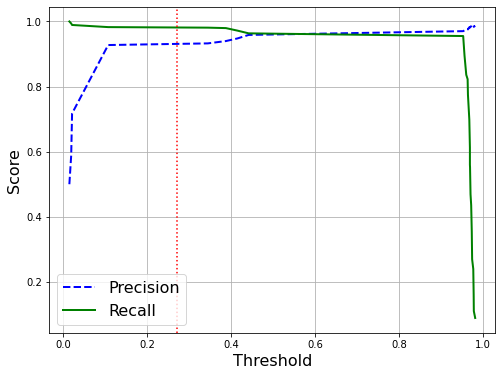

In [407]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores_1[:, 1])

# Plot precision-recall curve and decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="lower left", fontsize=16)
plt.grid(True)

# Plot vertical line at the threshold for maximum F1 score
plt.axvline(x=0.27 , color='r', linestyle=':')    # Vertical line at best threshold1
#plt.axvline(x=0.416, color='r', linestyle=':')    # Vertical line at best threshold2

plt.show()

In [346]:
from sklearn.preprocessing import LabelEncoder

# Assuming `emission_cat_train` and `emission_cat_test` are your label arrays
# and you have already imported numpy

# Initialize LabelEncoder
label_encoder = LabelEncoder()

emission_cat_train = stratified_train_classifier[["CO2 Emission Class"]]
emission_cat_test = stratified_test_classifier[["CO2 Emission Class"]]

# Assuming `emission_cat_train` and `emission_cat_test` are numpy arrays
train_label_encoded = label_encoder.fit_transform(emission_cat_train.squeeze())
test_label_encoded = label_encoder.transform(emission_cat_test.squeeze())

# Get the categories after encoding
categories = label_encoder.classes_

# Print the categories and their corresponding indices
for i, label in enumerate(categories):
    print(f"Index {i}: {label}")


Index 0: acceptable
Index 1: unacceptable


In [356]:
from imblearn.under_sampling import RandomUnderSampler

# Define the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(RandomFClassifier_data_train, train_label_encoded)



In [357]:
X_resampled.isna().sum()

COMB (L/100 km)     0
COMB (mpg)          0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
CYLINDERS           0
ENGINE SIZE         0
FUEL_E              0
dtype: int64

In [363]:
RandomFClassifier_data_train.shape

(18044, 7)

In [362]:
X_resampled.shape

(14858, 7)

In [360]:
np.isnan(y_resampled).sum()

0

In [361]:
y_resampled.shape

(14858,)

In [348]:
import pandas as pd

# Convert numpy arrays to pandas DataFrames
X_resampled_df = pd.DataFrame(X_resampled)
y_resampled_df = pd.DataFrame(y_resampled)

# Concatenate the DataFrames along columns (axis=1)
concatenated_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)


In [349]:
concatenated_data[0].value_counts()

0
1.0    7429
0.0    7429
Name: count, dtype: int64

In [350]:
concatenated_data.isna().sum()

COMB (L/100 km)     5159
COMB (mpg)          5159
FUEL CONSUMPTION    5159
HWY (L/100 km)      5159
CYLINDERS           5159
ENGINE SIZE         5159
FUEL_E              5159
0                   5159
dtype: int64

In [351]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_RandomFClass_train = scaler.fit_transform(RandomFClassifier_data_train)
scaled_RandomFClass_test = scaler.fit_transform(RandomFClassifier_data_test)

scaled_AllDClass_train = scaler.fit_transform(All_data_Classifier_train)
scaled_AllDClass_test = scaler.fit_transform(All_data_Classifier_test)

In [352]:
scaled_resample_train = scaler.fit_transform(X_resampled)

In [ ]:
from sklearn.model_selection import train_test_split

x_train_RandomF_C, x_val_RandomF_C, y_train_RandomF_C, y_val_RandomF_C = train_test_split(scaled_resample_train,
                                                y_resampled, stratify=y_resampled, test_size=0.2, random_state=10)


In [336]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # Limiting the range of hyperparameters
    {'n_estimators': [10, 20, 30], 
     'max_features': [2, 4, 6, 8],  # Restricting the number of features to consider
     'max_depth': [2, 3],  # Allowing for some depth but not too deep
    }
]

forest_class = RandomForestClassifier(random_state=10)

grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_macro', return_train_score=True)

grid_search_forest.fit(x_train_RandomF_C, y_train_RandomF_C)

RandomForestClass_best_estimator = grid_search_forest.best_estimator_

grid_search_forest.best_params_

{'max_depth': 3, 'max_features': 8, 'n_estimators': 30}

In [337]:
from sklearn.metrics import classification_report

# Predict labels for validation set
y_val_pred = RandomForestClass_best_estimator.predict(x_val_RandomF_C)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_RandomF_C, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1486
           1       1.00      0.98      0.99      1486

    accuracy                           0.99      2972
   macro avg       0.99      0.99      0.99      2972
weighted avg       0.99      0.99      0.99      2972



In [327]:
import numpy as np

# Define the target class
target_class = 1

# Convert one-hot encoded labels to binary labels
y_train_RandomF_C_0 = (y_train_RandomF_C == target_class)
y_val_RandomF_C_0 = (y_val_RandomF_C == target_class)


In [328]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

RF_clf = RandomForestClass_best_estimator
RF_clf.fit(x_train_RandomF_C, y_train_RandomF_C_0)

y_train_RandomF_C_0_pred = cross_val_predict(RF_clf, x_train_RandomF_C, y_train_RandomF_C_0, cv=3, n_jobs=-1)

confusion_matrix(y_train_RandomF_C_0, y_train_RandomF_C_0_pred)

array([[5932,   11],
       [  80, 5863]])

# #

In [271]:
pd.set_option('display.max_columns', None) #see all columns
Full_dataset3

,Unnamed: 0,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,high,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22552,22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22553,22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22554,22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
numeric_data = Full_dataset3.select_dtypes(include=['number'])

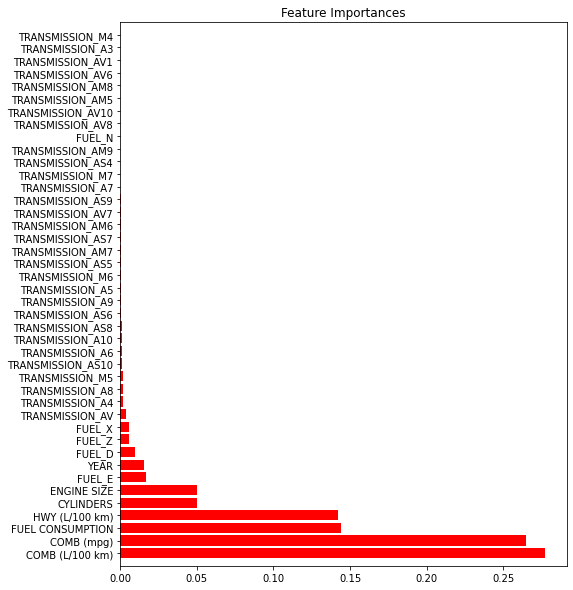

In [62]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Selecting only numeric columns from the dataset
numeric_data = Full_dataset3.select_dtypes(include=['number'])

X = numeric_data.drop(['EMISSIONS', 'CO2 Emission Class_high', 'CO2 Emission Class_low',
                       'CO2 Emission Class_medium', 'Unnamed: 0'], axis=1)
y = numeric_data[['CO2 Emission Class_high', 'CO2 Emission Class_low', 'CO2 Emission Class_medium']]


# Train a RandomForestClassifier model
rfC = RandomForestClassifier()
rfC.fit(X, y)

# Plot feature importances
importances = rfC.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 10))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")  # Swap x and y axis
plt.yticks(range(X.shape[1]), X.columns[indices])  # Set y-axis ticks as feature names
plt.ylim([-1, X.shape[1]])  # Set y-axis limit
plt.show()


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

features_classifier = Full_dataset3.drop(["Unnamed: 0", "EMISSIONS"], axis=1)
target_classifier = Full_dataset3["CO2 Emission Class"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(features_classifier, target_classifier):
    stratified_train_classifier = features_classifier.loc[train_index]
    stratified_test_classifier = features_classifier.loc[test_index]

In [6]:
RandomFClassifier_data_train = stratified_train_classifier[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)", "CYLINDERS", "ENGINE SIZE", "YEAR",
                                                "FUEL_E"]]
RandomFClassifier_data_test = stratified_test_classifier[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)", "CYLINDERS", "ENGINE SIZE", "YEAR",
                                                "FUEL_E"]]

All_data_Classifier_train = (stratified_train_classifier.drop(["CO2 Emission Class",
                                    'CO2 Emission Class_high', 'CO2 Emission Class_low', 
                                                              'CO2 Emission Class_medium'] , axis=1)).select_dtypes(include=['number'])
All_data_Classifier_test = (stratified_test_classifier.drop(["CO2 Emission Class",
                                    'CO2 Emission Class_high', 'CO2 Emission Class_low', 
                                                              'CO2 Emission Class_medium'] , axis=1)).select_dtypes(include=['number'])


In [7]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
emission_cat_train = stratified_train_classifier[["CO2 Emission Class"]]
emission_cat_test = stratified_test_classifier[["CO2 Emission Class"]]

train_label_1hot = cat_encoder.fit_transform(emission_cat_train).toarray()
test_label_1hot = cat_encoder.fit_transform(emission_cat_test).toarray()

In [169]:
categories = cat_encoder.categories_

# Print the categories and their corresponding indices
for i, category in enumerate(categories[0]):
    print(f"Index {i}: {category}")

Index 0: high
Index 1: low
Index 2: medium


In [256]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

train_label_encoded = label_encoder.fit_transform(emission_cat_train.squeeze())
test_label_encoded = label_encoder.fit_transform(emission_cat_test.squeeze())

In [259]:
from sklearn.preprocessing import LabelEncoder

# Assuming `emission_cat_train` and `emission_cat_test` are your label arrays
# and you have already imported numpy

# Initialize LabelEncoder
label_encoder = LabelEncoder()

emission_cat_train = stratified_train_classifier[["CO2 Emission Class"]]
emission_cat_test = stratified_test_classifier[["CO2 Emission Class"]]

# Assuming `emission_cat_train` and `emission_cat_test` are numpy arrays
train_label_encoded = label_encoder.fit_transform(emission_cat_train.squeeze())
test_label_encoded = label_encoder.transform(emission_cat_test.squeeze())

# Get the categories after encoding
categories = label_encoder.classes_

# Print the categories and their corresponding indices
for i, label in enumerate(categories):
    print(f"Index {i}: {label}")


Index 0: high
Index 1: low
Index 2: medium


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_RandomFClass_train = scaler.fit_transform(RandomFClassifier_data_train)
scaled_RandomFClass_test = scaler.fit_transform(RandomFClassifier_data_test)

scaled_AllDClass_train = scaler.fit_transform(All_data_Classifier_train)
scaled_AllDClass_test = scaler.fit_transform(All_data_Classifier_test)

In [24]:
classification_performance_df = pd.DataFrame(columns=['Model', 'F1'])

In [25]:
# Define a function to manually add model performance
def add_model_performance_classification(df, model_name, f1):
    df_length = len(df)
    df.loc[df_length] = [model_name, f1]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

def evaluate_model_with_validation_classifier(model, X_train, X_val, y_train, y_val):
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Train set
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    train_f1 = f1_score(y_train, y_train_predict, average='weighted')
    print(f'{model_name} Training Set F1 Score: {train_f1:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_f1 = f1_score(y_val, y_val_predict, average='weighted')
    print(f'{model_name} Validation Set F1 Score: {val_f1:.2f}')

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

def evaluate_model_with_validation_classifier2(model, X_train, X_val, y_train, y_val):
    # Get the name of the model class
    model_name = type(model).__name__
    
    # Train set
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    train_f1 = f1_score(y_train, y_train_predict, average='macro')
    print(f'{model_name} Training Set F1 Score: {train_f1:.2f}')
    
    # Validation set
    y_val_predict = model.predict(X_val)
    val_f1 = f1_score(y_val, y_val_predict, average='macro')
    print(f'{model_name} Validation Set F1 Score: {val_f1:.2f}')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y):
   
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt.show()

# #

In [261]:
from sklearn.model_selection import train_test_split

x_train_RandomF_C, x_val_RandomF_C, y_train_RandomF_C, y_val_RandomF_C = train_test_split(scaled_RandomFClass_train,
                                                train_label_encoded, stratify=train_label_encoded, test_size=0.2, random_state=10)


In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # Limiting the range of hyperparameters
    {'n_estimators': [10, 20, 30], 
     'max_features': [2, 4, 6, 8],  # Restricting the number of features to consider
     'max_depth': [2, 5, 8],  # Allowing for some depth but not too deep
    }
]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_macro', return_train_score=True)

grid_search_forest.fit(x_train_RandomF_C, y_train_RandomF_C)

RandomForestClass_best_estimator = grid_search_forest.best_estimator_

grid_search_forest.best_params_

evaluate_model_with_validation_classifier2(RandomForestClass_best_estimator, x_train_RandomF_C, x_val_RandomF_C, y_train_RandomF_C, y_val_RandomF_C)

RandomForestClassifier Training Set F1 Score: 1.00
RandomForestClassifier Validation Set F1 Score: 0.99


In [263]:
import numpy as np

# Define the target class
target_class = 0

# Convert one-hot encoded labels to binary labels
y_train_RandomF_C_0 = (y_train_RandomF_C == target_class)
y_val_RandomF_C_0 = (y_val_RandomF_C == target_class)


In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

RF_clf = RandomForestClass_best_estimator
RF_clf.fit(x_train_RandomF_C, y_train_RandomF_C_0)

y_train_RandomF_C_0_pred = cross_val_predict(RF_clf, x_train_RandomF_C, y_train_RandomF_C_0, cv=3, n_jobs=-1)

confusion_matrix(y_train_RandomF_C_0, y_train_RandomF_C_0_pred)

array([[8473,   19],
       [  81, 5862]])

In [265]:
from sklearn.metrics import precision_recall_curve

y_scores_0 = cross_val_predict(RF_clf, x_train_RandomF_C, y_train_RandomF_C_0, cv=3, method="predict_proba", n_jobs=-1)

# Compute precision-recall curve
precisions_0, recalls_0, thresholds_0 = precision_recall_curve(y_train_RandomF_C_0, y_scores_0[:, 1])

eps = 0.00001
f1_0 = 2/(1/(precisions_0 + eps)+ 1/(recalls_0 + eps))
ind = np.argmax(f1_0)

precisions_0[ind], recalls_0[ind], thresholds_0[ind]

(0.9967714528462192, 0.9870435806831567, 0.4638722075426376)

In [266]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the raw prediction scores for validation data
y_val_scores = RF_clf.predict_proba(x_val_RandomF_C)[:, 1]

# Apply the threshold to get binary predictions for validation data
y_val_pred_thresholded = (y_val_scores >= thresholds_0[ind] )

precision = precision_score(y_val_RandomF_C_0, y_val_pred_thresholded)
recall = recall_score(y_val_RandomF_C_0, y_val_pred_thresholded)
f1 = f1_score(y_val_RandomF_C_0, y_val_pred_thresholded)

print(f'Metrics with {thresholds_0[ind]:.2f} threshold:')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Metrics with 0.46 threshold:
Recall: 0.9858681022880216
Precision: 0.9972770592239619
F1 Score: 0.9915397631133672


In [267]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

fpr_0, tpr_0, thresholds_0 = roc_curve(y_train_RandomF_C_0, y_scores_0[:, 1])

dist = np.sqrt((0-fpr_0)**2 + (1-tpr_0)**2)
ind = np.argmin(dist)
fpr_0[ind], tpr_0[ind], thresholds_0[ind] 

# Get the raw prediction scores for validation data
y_val_scores = RF_clf.predict_proba(x_val_RandomF_C)[:, 1]

# Apply the threshold to get binary predictions for validation data
y_val_pred_thresholded = (y_val_scores >= thresholds_0[ind] )

precision = precision_score(y_val_RandomF_C_0, y_val_pred_thresholded)
recall = recall_score(y_val_RandomF_C_0, y_val_pred_thresholded)
f1 = f1_score(y_val_RandomF_C_0, y_val_pred_thresholded)

print(f'Metrics with {thresholds_0[ind]:.2f} threshold:')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Metrics with 0.30 threshold:
Recall: 0.990578734858681
Precision: 0.9945945945945946
F1 Score: 0.9925826028320971


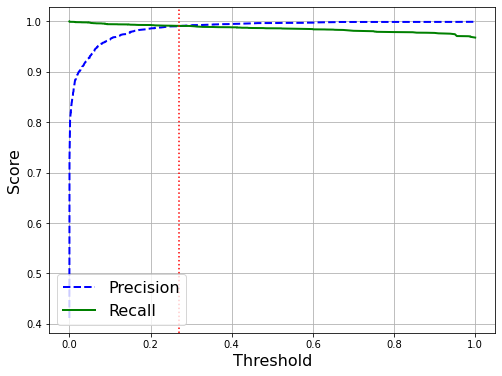

In [268]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_RandomF_C_0, y_scores_0[:, 1])

# Plot precision-recall curve and decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="lower left", fontsize=16)
plt.grid(True)

# Plot vertical line at the threshold for maximum F1 score
plt.axvline(x=0.27 , color='r', linestyle=':')    # Vertical line at best threshold1
#plt.axvline(x=0.416, color='r', linestyle=':')    # Vertical line at best threshold2

plt.show()


# ############

In [119]:
from sklearn.model_selection import train_test_split

x_train_RandomF_C, x_val_RandomF_C, y_train_RandomF_C, y_val_RandomF_C = train_test_split(scaled_RandomFClass_train,
                                                train_label_1hot, stratify=train_label_1hot, test_size=0.2, random_state=10)

x_train_AllD_C, x_val_AllD_C, y_train_AllD_C, y_val_AllD_C = train_test_split(scaled_AllDClass_train,
                                                train_label_1hot, stratify=train_label_1hot, test_size=0.2, random_state=10)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]}
  ]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_RandomF_C, y_train_RandomF_C)

RandomForestClass_best_estimator = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator, x_train_RandomF_C, x_val_RandomF_C,
                                          y_train_RandomF_C, y_val_RandomF_C)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator, "Learning Curve",
                    x_train_RandomF_C, y_train_RandomF_C)

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # Limiting the range of hyperparameters
    {'n_estimators': [10, 20, 30], 
     'max_features': [2, 4, 6, 8],  # Restricting the number of features to consider
     'max_depth': [2, 5, 8],  # Allowing for some depth but not too deep
    }
]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_macro', return_train_score=True)

grid_search_forest.fit(x_train_RandomF_C, y_train_RandomF_C)

RandomForestClass_best_estimator = grid_search_forest.best_estimator_

grid_search_forest.best_params_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator, x_train_RandomF_C, x_val_RandomF_C, y_train_RandomF_C, y_val_RandomF_C)

RandomForestClassifier Training Set F1 Score: 0.99
RandomForestClassifier Validation Set F1 Score: 0.99


import pandas as pd
pd.set_option('display.max_rows', None)
# Convert cv_results_ to a DataFrame for easier visualization
RandomforestC_results_df = pd.DataFrame(grid_search_forest.cv_results_)

# Display relevant columns
relevant_columns = ['param_n_estimators', 'param_max_features', 'param_max_depth', 'mean_test_score', 'std_test_score']
RandomforestC_results_df[relevant_columns]


# Reset pandas to default behavior for maximum number of rows displayed
pd.reset_option('display.max_rows')


In [248]:
import numpy as np

# Define the target class
target_class = 0

# Convert one-hot encoded labels to binary labels
y_train_RandomF_C_0 = (y_train_RandomF_C[:, 0] == 1)
y_val_RandomF_C_0 = (y_val_RandomF_C[:, 0] == 1)


In [247]:
y_train_RandomF_C[:, 0] == 1

array([False,  True,  True, ...,  True, False, False])

In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

RF_clf = RandomForestClass_best_estimator
RF_clf.fit(x_train_RandomF_C, y_train_RandomF_C_0)

y_train_RandomF_C_0_pred = cross_val_predict(RF_clf, x_train_RandomF_C, y_train_RandomF_C_0, cv=3, n_jobs=-1)

confusion_matrix(y_train_RandomF_C_0, y_train_RandomF_C_0_pred)

array([[8468,   24],
       [  79, 5864]])

In [250]:
from sklearn.metrics import precision_recall_curve

y_scores_0 = cross_val_predict(RF_clf, x_train_RandomF_C, y_train_RandomF_C_0, cv=3, method="predict_proba", n_jobs=-1)

# Compute precision-recall curve
precisions_0, recalls_0, thresholds_0 = precision_recall_curve(y_train_RandomF_C_0, y_scores_0[:, 1])

eps = 0.00001
f1_0 = 2/(1/(precisions_0 + eps)+ 1/(recalls_0 + eps))
ind = np.argmax(f1_0)

precisions_0[ind], recalls_0[ind], thresholds_0[ind]

(0.9927487352445193, 0.9905771495877503, 0.2732719654058029)

In [251]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the raw prediction scores for validation data
y_val_scores = RF_clf.predict_proba(x_val_RandomF_C)[:, 1]

# Apply the threshold to get binary predictions for validation data
y_val_pred_thresholded = (y_val_scores >= thresholds_0[ind] )

precision = precision_score(y_val_RandomF_C_0, y_val_pred_thresholded)
recall = recall_score(y_val_RandomF_C_0, y_val_pred_thresholded)
f1 = f1_score(y_val_RandomF_C_0, y_val_pred_thresholded)

print(f'Metrics with {thresholds_0[ind]:.2f} threshold:')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Metrics with 0.27 threshold:
Recall: 0.990578734858681
Precision: 0.9932523616734144
F1 Score: 0.9919137466307278


In [252]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

fpr_0, tpr_0, thresholds_0 = roc_curve(y_train_RandomF_C_0, y_scores_0[:, 1])

dist = np.sqrt((0-fpr_0)**2 + (1-tpr_0)**2)
ind = np.argmin(dist)
fpr_0[ind], tpr_0[ind], thresholds_0[ind] 

# Get the raw prediction scores for validation data
y_val_scores = RF_clf.predict_proba(x_val_RandomF_C)[:, 1]

# Apply the threshold to get binary predictions for validation data
y_val_pred_thresholded = (y_val_scores >= thresholds_0[ind] )

precision = precision_score(y_val_RandomF_C_0, y_val_pred_thresholded)
recall = recall_score(y_val_RandomF_C_0, y_val_pred_thresholded)
f1 = f1_score(y_val_RandomF_C_0, y_val_pred_thresholded)

print(f'Metrics with {thresholds_0[ind]:.2f} threshold:')
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Metrics with 0.27 threshold:
Recall: 0.990578734858681
Precision: 0.9932523616734144
F1 Score: 0.9919137466307278


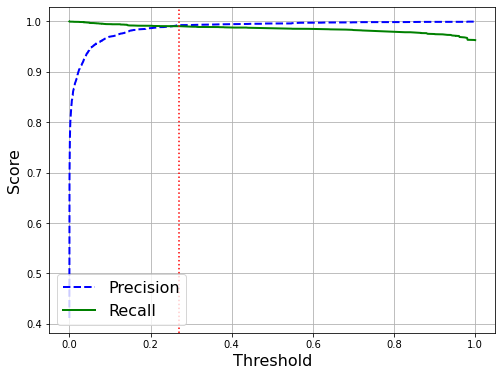

In [254]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_RandomF_C_0, y_scores_0[:, 1])

# Plot precision-recall curve and decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="lower left", fontsize=16)
plt.grid(True)

# Plot vertical line at the threshold for maximum F1 score
plt.axvline(x=0.27 , color='r', linestyle=':')    # Vertical line at best threshold1
#plt.axvline(x=0.416, color='r', linestyle=':')    # Vertical line at best threshold2

plt.show()


In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # Limiting the range of hyperparameters
    {'n_estimators': [10, 20, 30, 40 , 50], 
     'max_features': [2, 4, 6, 8, 16, 30, 40],  # Restricting the number of features to consider
     'max_depth': [2, 5, 8, 10],  # Allowing for some depth but not too deep
    }
]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest_AllD = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_macro', return_train_score=True)

grid_search_forest_AllD.fit(x_train_AllD_C, y_train_AllD_C)

RandomForestClass_best_estimator = grid_search_forest_AllD.best_estimator_

grid_search_forest_AllD.best_params_

{'max_depth': 8, 'max_features': 40, 'n_estimators': 50}

In [235]:
import numpy as np

# Define the target class
target_class = 0

# Convert one-hot encoded labels to binary labels
y_train_RandomF_C_0 = (y_train_RandomF_C2 == target_class)
y_val_RandomF_C_0 = (y_val_RandomF_C2 == target_class)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

RF_clf = RandomForestClass_best_estimator
RF_clf.fit(x_train_RandomF_C, y_train_RandomF_C_0)

y_train_RandomF_C_0_pred = cross_val_predict(RF_clf, x_train_RandomF_C, y_train_RandomF_C_0, cv=3, n_jobs=-1)

confusion_matrix(y_train_RandomF_C_0, y_train_RandomF_C_0_pred)

In [51]:
# use label encoder instead
x_train_RandomF_C2, x_val_RandomF_C2, y_train_RandomF_C2, y_val_RandomF_C2 = train_test_split(scaled_RandomFClass_train,
                                                                        train_label_encoded, test_size=0.2, random_state=10)


In [77]:
y_train_RandomF_C2_0 = (y_train_RandomF_C2 == 0)
y_val_RandomF_C2_0 = (y_val_RandomF_C2 == 0)

In [78]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) #stoping criteria, to stop the training 
sgd_clf.fit(x_train_RandomF_C2, y_train_RandomF_C2_0)

SGDClassifier(random_state=42)

In [81]:
from sklearn.model_selection import cross_val_predict

y_train_RandomF_C2_0_pred = cross_val_predict(sgd_clf, x_train_RandomF_C2, y_train_RandomF_C2_0, cv=3, n_jobs=-1)

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_RandomF_C2_0, y_train_RandomF_C2_0_pred)

array([[8403,   98],
       [ 179, 5755]])

In [83]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_RandomF_C2_0, y_train_RandomF_C2_0_pred)

0.9832564496839228

In [84]:
recall_score(y_train_RandomF_C2_0, y_train_RandomF_C2_0_pred)

0.969834850016852

In [85]:
from sklearn.metrics import f1_score

f1_score(y_train_RandomF_C2_0, y_train_RandomF_C2_0_pred)

0.9764995333842369

In [104]:
y_scores_0 = cross_val_predict(sgd_clf, x_train_RandomF_C2, y_train_RandomF_C2_0, cv=3,
                             method="decision_function", n_jobs=-1)

In [105]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_RandomF_C2_0, y_scores_0)

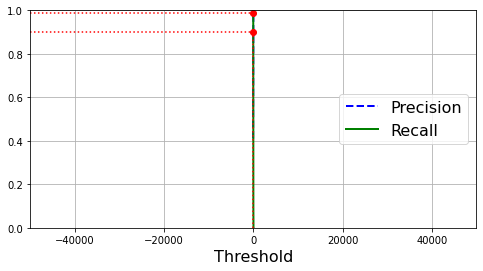

In [89]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

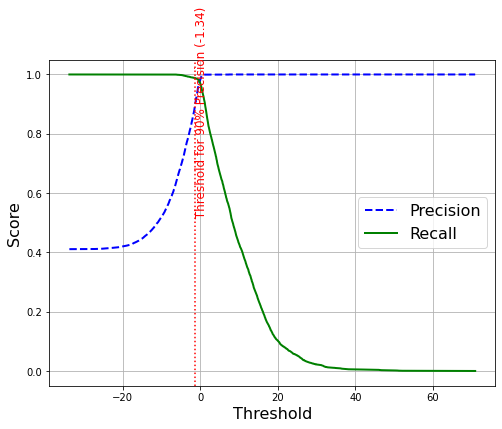

In [90]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_RandomF_C2_0, y_scores_0)

# Plot precision-recall curve and decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="center right", fontsize=16)
plt.grid(True)

# Find threshold for 90% precision
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

# Plot threshold for 90% precision
plt.axvline(x=threshold_90_precision, color='r', linestyle=':')
plt.text(threshold_90_precision, 0.5, f'  Threshold for 90% Precision ({threshold_90_precision:.2f})', rotation=90, fontsize=12, color='r')
plt.show()


In [110]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_recall_with_threshold(y_true, y_scores):
    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)

    # Plot precision-recall curve and decision threshold
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    plt.legend(loc="center right", fontsize=16)
    plt.grid(True)

    # Find threshold for 90% precision
    recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
    threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

    # Plot threshold for 90% precision
    plt.axvline(x=threshold_90_precision, color='r', linestyle=':')

    # Automatically adjust x-axis limits based on threshold range
    plt.xlim([min(thresholds), max(thresholds)])

    plt.show()

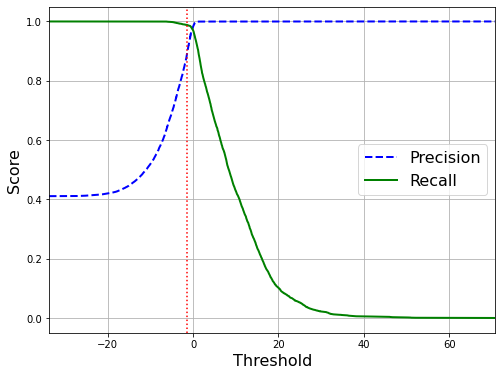

In [112]:
y_train_RandomF_C2_0 = (y_train_RandomF_C2 == 0)
y_scores_0 = cross_val_predict(sgd_clf, x_train_RandomF_C2, y_train_RandomF_C2_0, cv=3,
                             method="decision_function", n_jobs=-1)
plot_precision_recall_with_threshold(y_train_RandomF_C2_0, y_scores_0)

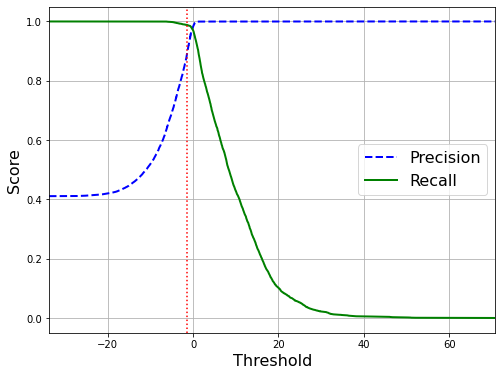

In [103]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_RandomF_C2_0, y_scores_0)

# Plot precision-recall curve and decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="center right", fontsize=16)
plt.grid(True)

# Find threshold for 90% precision
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

# Plot threshold for 90% precision
plt.axvline(x=threshold_90_precision, color='r', linestyle=':')

# Automatically adjust x-axis limits based on threshold range
plt.xlim([min(thresholds), max(thresholds)])

plt.show()


In [106]:
y_train_RandomF_C2_1 = (y_train_RandomF_C2 == 1)
y_scores_1 = cross_val_predict(sgd_clf, x_train_RandomF_C2, y_train_RandomF_C2_1, cv=3,
                             method="decision_function", n_jobs=-1)

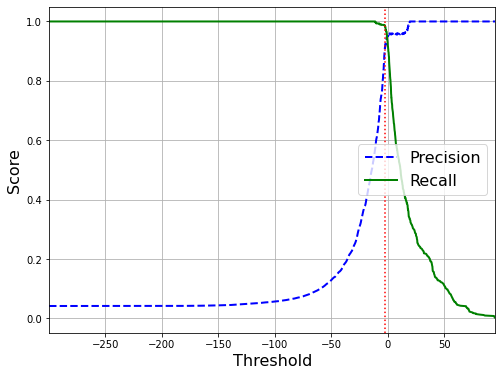

In [107]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_RandomF_C2_1, y_scores_1)

# Plot precision-recall curve and decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="center right", fontsize=16)
plt.grid(True)

# Find threshold for 90% precision
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

# Plot threshold for 90% precision
plt.axvline(x=threshold_90_precision, color='r', linestyle=':')

# Automatically adjust x-axis limits based on threshold range
plt.xlim([min(thresholds), max(thresholds)])

plt.show()


In [108]:
y_train_RandomF_C2_2 = (y_train_RandomF_C2 == 2)
y_scores_2 = cross_val_predict(sgd_clf, x_train_RandomF_C2, y_train_RandomF_C2_2, cv=3,
                             method="decision_function", n_jobs=-1)

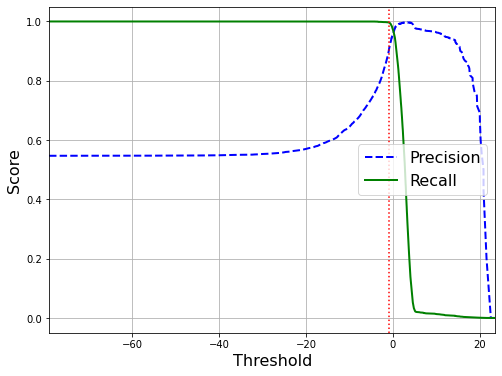

In [109]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_RandomF_C2_2, y_scores_2)

# Plot precision-recall curve and decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="center right", fontsize=16)
plt.grid(True)

# Find threshold for 90% precision
recall_90_precision = recalls[np.argmax(precisions >= 0.90)] # need this for later
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # nedd this for later

# Plot threshold for 90% precision
plt.axvline(x=threshold_90_precision, color='r', linestyle=':')

# Automatically adjust x-axis limits based on threshold range
plt.xlim([min(thresholds), max(thresholds)])

plt.show()


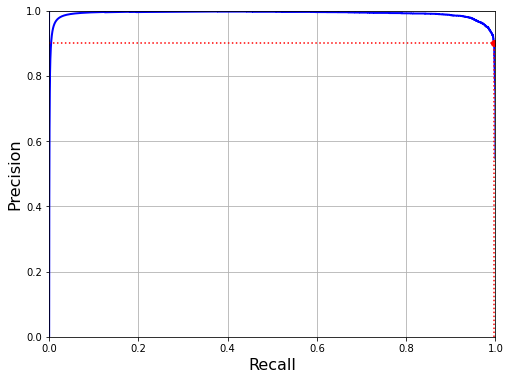

In [114]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

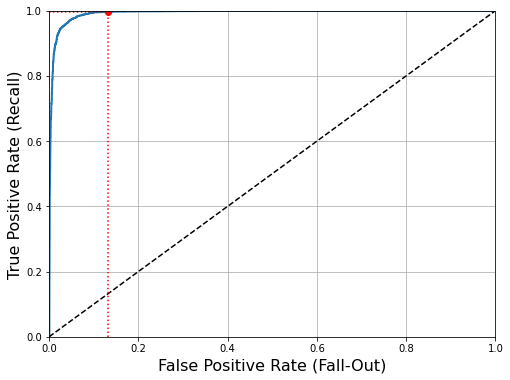

In [115]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_RandomF_C2_2, y_scores_2)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

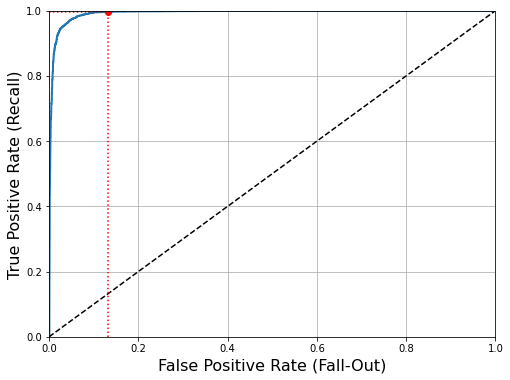

In [116]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train_RandomF_C2_2, y_scores_2)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

# Get the maximum value of FPR where TPR >= recall_90_precision
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]

# Plot a line indicating the point where TPR >= recall_90_precision intersects the curve
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")

# Adjust x-axis limits to ensure the entire ROC curve is visible
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()


In [117]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores, recall_90_precision):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

    # Find threshold for 90% precision
    fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]

    # Plot a line indicating the point where TPR >= recall_90_precision intersects the curve
    plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
    plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
    plt.plot([fpr_90], [recall_90_precision], "ro")

    # Adjust x-axis and y-axis limits
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.show()


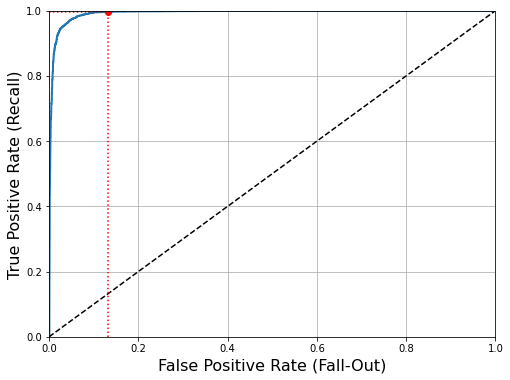

In [118]:
# Example usage:
plot_roc_curve(y_train_RandomF_C2_2, y_scores_2, recalls[np.argmax(precisions >= 0.90)])

RandomForestClassifier Training Set F1 Score: 1.00
RandomForestClassifier Validation Set F1 Score: 0.99


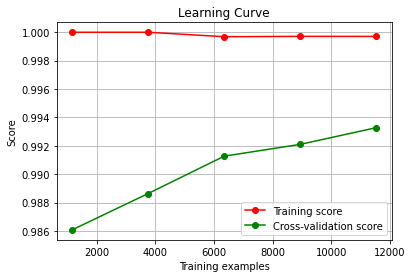

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]}
  ]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_RandomF_C2, y_train_RandomF_C2)

RandomForestClass_best_estimator2 = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator2, x_train_RandomF_C2, x_val_RandomF_C2,
                                          y_train_RandomF_C2, y_val_RandomF_C2)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator2, "Learning Curve",
                    x_train_RandomF_C2, y_train_RandomF_C2)

In [54]:
# also check on the test set as the training and validation score was to high
X_test =scaled_RandomFClass_test
y_test = test_label_encoded
# Use the trained model to make predictions on the test set
y_pred = RandomForestClass_best_estimator2.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9942399507427151


In [55]:
grid_search_forest.classes_

array([0, 1, 2])

In [61]:
y_val_RandomF_C2

array([2, 2, 0, ..., 2, 0, 0])

In [62]:
from sklearn.metrics import classification_report

# Predict labels for validation set
y_val_pred2 = RandomForestClass_best_estimator2.predict(x_val_RandomF_C2)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_RandomF_C2, y_val_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1495
           1       0.98      1.00      0.99       139
           2       0.99      0.99      0.99      1975

    accuracy                           0.99      3609
   macro avg       0.99      1.00      0.99      3609
weighted avg       0.99      0.99      0.99      3609



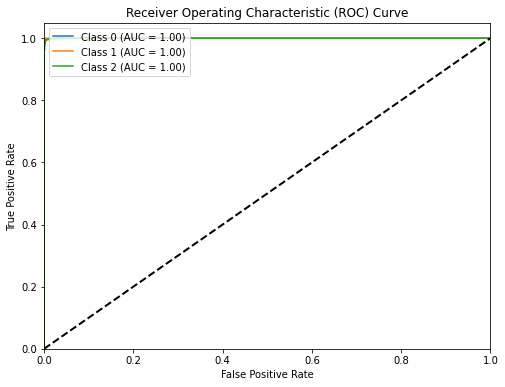

Macro-average AUC: 0.9998813850335614


In [75]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Convert y_val_RandomF_C to a NumPy array if it's a list
y_val_RandomF_C2 = np.array(y_val_RandomF_C2)

y_val_pred_proba2 = RandomForestClass_best_estimator2.predict_proba(x_val_RandomF_C2)

# Initialize dictionaries to store fpr, tpr, and auc for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(len(grid_search_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_val_RandomF_C2 == i).astype(int), y_val_pred_proba2[:, i])  # Use probabilities of positive class
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(grid_search_forest.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {grid_search_forest.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="upper left")
plt.show()

# Compute macro-average AUC
macro_avg_auc = np.mean(list(roc_auc.values()))
print("Macro-average AUC:", macro_avg_auc)


In [59]:
from sklearn.metrics import confusion_matrix


# Confusion matrix
print("RandomForest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


RandomForest Confusion Matrix:
[[1847    0   11]
 [   0  184    2]
 [   9    4 2455]]


In [31]:
# also check on the test set as the training and validation score was to high
X_test =scaled_RandomFClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = RandomForestClass_best_estimator.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9942399507427151


In [38]:
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded labels back to original format
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix
print("RandomForest Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


RandomForest Confusion Matrix:
[[1847    0   11]
 [   0  184    2]
 [   9    4 2455]]


In [60]:
import pandas as pd

# To check If there is a data leakage between train and test
# Check for duplicate rows between the two datasets
duplicate_rows = pd.merge(stratified_train_classifier, stratified_test_classifier, how='inner')

# Print out the duplicate rows
print("Duplicate Rows between the two datasets:", duplicate_rows.shape[0])



Duplicate Rows between the two datasets: 0


In [73]:
add_model_performance_classification(classification_performance_df, "Random Forest", 0.99)

RandomForestClassifier Training Set F1 Score: 1.00
RandomForestClassifier Validation Set F1 Score: 1.00


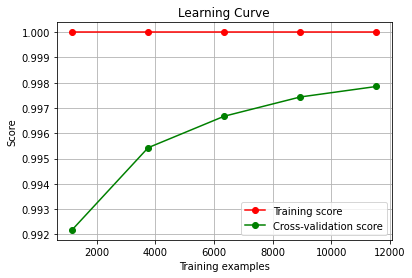

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45]}
  ]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_AllD_C, y_train_AllD_C)

RandomForestClass_best_estimator_AllD = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator_AllD, x_train_AllD_C, x_val_AllD_C,
                                          y_train_AllD_C, y_val_AllD_C)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator_AllD, "Learning Curve",
                    x_train_AllD_C, y_train_AllD_C)

In [205]:
grid_search_forest.best_params_

{'max_features': 30, 'n_estimators': 100}

In [202]:
# also check on the test set as the training and validation score was to high
X_test =scaled_AllDClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = RandomForestClass_best_estimator_AllD.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9977835696136896


RandomForestClassifier Training Set F1 Score: 1.00
RandomForestClassifier Validation Set F1 Score: 1.00


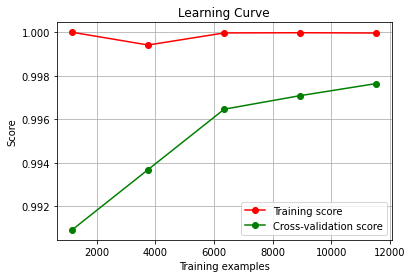

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': np.arange(1, 21), 'max_features': np.arange(1, 11)},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 'n_estimators': np.arange(1, 21), 'max_features': np.arange(1, 11)}
  ]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_AllD_C, y_train_AllD_C)

RandomForestClass_best_estimator_AllD2 = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator_AllD2, x_train_AllD_C, x_val_AllD_C,
                                          y_train_AllD_C, y_val_AllD_C)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator_AllD2, "Learning Curve",
                    x_train_AllD_C, y_train_AllD_C)

In [207]:
grid_search_forest.best_params_

{'max_features': 9, 'n_estimators': 15}

RandomForestClassifier Training Set F1 Score: 1.00
RandomForestClassifier Validation Set F1 Score: 0.99


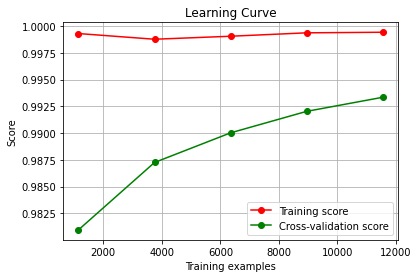

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': np.arange(1, 21), 'max_features': np.arange(1, 11)},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 'n_estimators': np.arange(1, 21), 'max_features': np.arange(1, 11)}
  ]

forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_RandomF_C, y_train_RandomF_C)

RandomForestClass_best_estimator2 = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator2, x_train_RandomF_C, x_val_RandomF_C,
                                          y_train_RandomF_C, y_val_RandomF_C)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator2, "Learning Curve",
                    x_train_RandomF_C, y_train_RandomF_C)

In [210]:
grid_search_forest.best_params_

{'max_features': 1, 'n_estimators': 13}

In [211]:
# also check on the test set as the training and validation score was to high
X_test =scaled_RandomFClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = RandomForestClass_best_estimator2.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9935731313270991


RandomForestClassifier Training Set F1 Score: 0.98
RandomForestClassifier Validation Set F1 Score: 0.98


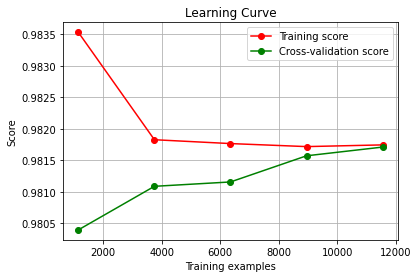

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': np.arange(1, 10), 
     'max_features': np.arange(1, 9),
     'max_depth':np.arange(1, 4),  # Add max_depth values
     },    # Add min_samples_leaf values
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 
     'n_estimators': np.arange(1, 10), 
     'max_features': np.arange(1, 9),
     'max_depth': np.arange(1, 4),  # Add max_depth values
     }     # Add min_samples_leaf values
]


forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_RandomF_C, y_train_RandomF_C)

RandomForestClass_best_estimator2 = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator2, x_train_RandomF_C, x_val_RandomF_C,
                                          y_train_RandomF_C, y_val_RandomF_C)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator2, "Learning Curve",
                    x_train_RandomF_C, y_train_RandomF_C)

In [15]:
grid_search_forest.best_params_

{'max_depth': 3, 'max_features': 6, 'n_estimators': 3}

In [16]:
from sklearn.metrics import classification_report

# Predict labels for validation set
y_val_pred = RandomForestClass_best_estimator2.predict(x_val_RandomF_C)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_RandomF_C, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1495
           1       0.91      0.99      0.95       139
           2       0.98      0.99      0.98      1975

   micro avg       0.98      0.98      0.98      3609
   macro avg       0.96      0.98      0.97      3609
weighted avg       0.98      0.98      0.98      3609
 samples avg       0.98      0.98      0.98      3609



In [29]:
grid_search_forest.classes_

[array([0., 1.]), array([0., 1.]), array([0., 1.])]

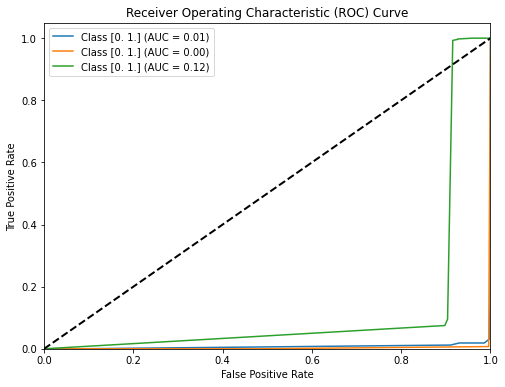

Macro-average AUC: 0.04534955362102982


In [27]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Convert y_val_RandomF_C to a NumPy array if it's a list
y_val_RandomF_C = np.array(y_val_RandomF_C)

y_val_pred_proba = RandomForestClass_best_estimator2.predict_proba(x_val_RandomF_C)

# Concatenate the list of arrays into a single array along the second axis
y_val_pred_proba_array = np.concatenate(y_val_pred_proba, axis=1)

# Initialize dictionaries to store fpr, tpr, and auc for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(len(grid_search_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_val_RandomF_C[:, i], y_val_pred_proba_array[:, i])  # Use probabilities of positive class
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(grid_search_forest.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {grid_search_forest.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="upper left")
plt.show()

# Compute macro-average AUC
macro_avg_auc = np.mean(list(roc_auc.values()))
print("Macro-average AUC:", macro_avg_auc)


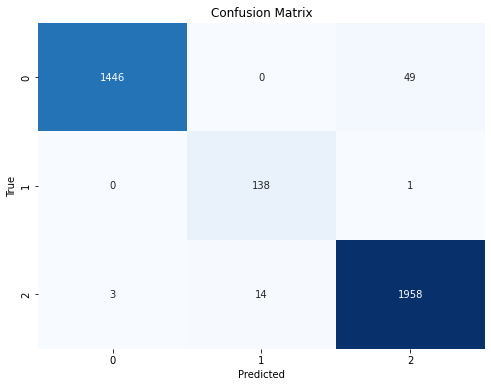

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for validation set
y_val_pred = RandomForestClass_best_estimator2.predict(x_val_RandomF_C)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_RandomF_C.argmax(axis=1), y_val_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


RandomForestClassifier Training Set F1 Score: 1.00
RandomForestClassifier Validation Set F1 Score: 0.99


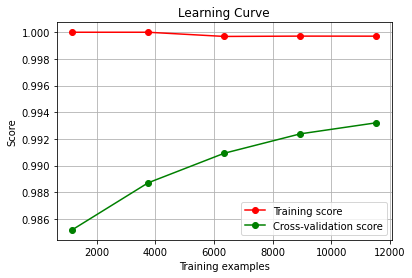

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # Limiting the range of hyperparameters
    {'n_estimators': [10, 50, 100], 
     'max_features': ['sqrt', 'log2'],  # Restricting the number of features to consider
     'max_depth': [None, 10, 20],  # Allowing for some depth but not too deep
     'min_samples_split': [2, 5, 10],  # Adjusting minimum samples for split
     'min_samples_leaf': [1, 2, 4],  # Adjusting minimum samples for leaf
     'bootstrap': [True, False]  # Exploring different bootstrap options
    }
]

forest_class = RandomForestClassifier(random_state=10)
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                                  scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_RandomF_C, y_train_RandomF_C)

RandomForestClass_best_estimator2 = grid_search_forest.best_estimator_

# Evaluate model with validation
evaluate_model_with_validation_classifier(RandomForestClass_best_estimator2, x_train_RandomF_C, x_val_RandomF_C,
                                          y_train_RandomF_C, y_val_RandomF_C)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator2, "Learning Curve",
                    x_train_RandomF_C, y_train_RandomF_C)


In [54]:
grid_search_forest.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [55]:
from sklearn.metrics import classification_report

# Predict labels for validation set
y_val_pred = RandomForestClass_best_estimator2.predict(x_val_RandomF_C)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_RandomF_C, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1495
           1       0.98      1.00      0.99       139
           2       0.99      0.99      0.99      1975

   micro avg       0.99      0.99      0.99      3609
   macro avg       0.99      1.00      0.99      3609
weighted avg       0.99      0.99      0.99      3609
 samples avg       0.99      0.99      0.99      3609



In [56]:
# also check on the test set as the training and validation score was to high
X_test =scaled_RandomFClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = RandomForestClass_best_estimator2.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9937964514751163


In [31]:
Some_feature_train = stratified_train_classifier[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)"]]
Some_feature_test = stratified_test_classifier[["COMB (L/100 km)", "COMB (mpg)", "FUEL CONSUMPTION",
                                                "HWY (L/100 km)"]]

scaler = StandardScaler()

scaled_Some_feature_train = scaler.fit_transform(Some_feature_train)
scaled_Some_feature_test = scaler.fit_transform(Some_feature_test)


In [32]:
x_train_SF, x_val_SF, y_train_SF, y_val_SF = train_test_split(scaled_Some_feature_train,
                                                                        train_label_1hot, test_size=0.2, random_state=10)

RandomForestClassifier Training Set F1 Score: 0.96
RandomForestClassifier Validation Set F1 Score: 0.96


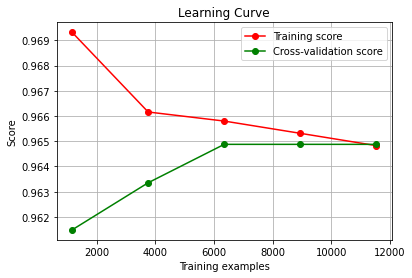

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': np.arange(1, 10), 
     'max_features': np.arange(1, 5),
     'max_depth':np.arange(1, 4),  # Add max_depth values
     },    # Add min_samples_leaf values
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 
     'n_estimators': np.arange(1, 10), 
     'max_features': np.arange(1, 5),
     'max_depth': np.arange(1, 4),  # Add max_depth values
     }     # Add min_samples_leaf values
]


forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_SF, y_train_SF)

RandomForestClass_best_estimator_SF = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator_SF, x_train_SF, x_val_SF,
                                          y_train_SF, y_val_SF)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator_SF, "Learning Curve",
                    x_train_SF, y_train_SF)

In [34]:
grid_search_forest.best_params_

{'max_depth': 3, 'max_features': 3, 'n_estimators': 4}

In [35]:
from sklearn.metrics import classification_report

# Predict labels for validation set
y_val_pred = RandomForestClass_best_estimator_SF.predict(x_val_SF)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_SF, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1495
           1       0.91      0.99      0.95       139
           2       0.97      0.95      0.96      1975

   micro avg       0.96      0.96      0.96      3609
   macro avg       0.94      0.97      0.96      3609
weighted avg       0.96      0.96      0.96      3609
 samples avg       0.96      0.96      0.96      3609



In [36]:
stratified_train_classifier.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 Emission Class,CO2 Emission Class_high,CO2 Emission Class_low,CO2 Emission Class_medium,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,TRANSMISSION_A10,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AM8,TRANSMISSION_AM9,TRANSMISSION_AS10,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
5965,2007,CHEVROLET,IMPALA,FULL-SIZE,3.9,6,A4,X,11.9,7.5,9.9,29,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14875,2015,JEEP,PATRIOT 4X4 TRAIL RATED,SUV - SMALL,2.4,4,AV,X,11.7,10.3,11.1,25,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12247,2013,BMW,650i xDRIVE COUPE,COMPACT,4.4,8,A8,Z,13.2,8.3,11.0,26,medium,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8487,2009,KIA,RIO,COMPACT,1.6,4,A4,X,7.7,5.6,6.8,42,low,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13566,2014,FORD,F150,PICKUP TRUCK - STANDARD,3.5,6,A6,X,12.9,9.0,11.1,25,medium,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
Some_feature_train2 = stratified_train_classifier[["FUEL_D", "FUEL_E", "FUEL_N",
                                                "FUEL_X", "FUEL_Z"]]
Some_feature_test2 = stratified_test_classifier[["FUEL_D", "FUEL_E", "FUEL_N",
                                                "FUEL_X", "FUEL_Z"]]

scaler = StandardScaler()

scaled_Some_feature_train2 = scaler.fit_transform(Some_feature_train2)
scaled_Some_feature_test2 = scaler.fit_transform(Some_feature_test2)


In [45]:
x_train_SF2, x_val_SF2, y_train_SF2, y_val_SF2 = train_test_split(scaled_Some_feature_train2,
                                                                        train_label_1hot, test_size=0.2, random_state=10)

RandomForestClassifier Training Set F1 Score: 0.44
RandomForestClassifier Validation Set F1 Score: 0.44


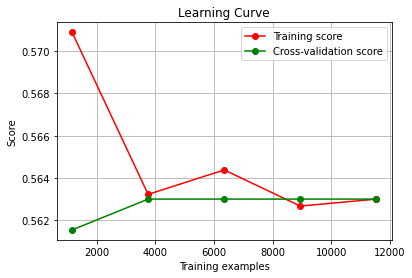

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': np.arange(1, 10), 
     'max_features': np.arange(1, 5),
     'max_depth':np.arange(1, 4),  # Add max_depth values
     },    # Add min_samples_leaf values
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [True], 
     'n_estimators': np.arange(1, 10), 
     'max_features': np.arange(1, 5),
     'max_depth': np.arange(1, 4),  # Add max_depth values
     }     # Add min_samples_leaf values
]


forest_class = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest = GridSearchCV(forest_class, param_grid, cv=5, n_jobs=-1,
                           scoring='f1_weighted', return_train_score=True)

grid_search_forest.fit(x_train_SF2, y_train_SF2)

RandomForestClass_best_estimator_SF2 = grid_search_forest.best_estimator_

evaluate_model_with_validation_classifier(RandomForestClass_best_estimator_SF2, x_train_SF2, x_val_SF2,
                                          y_train_SF2, y_val_SF2)

# Plot learning curve
plot_learning_curve(RandomForestClass_best_estimator_SF2, "Learning Curve",
                    x_train_SF2, y_train_SF2)

In [47]:
from sklearn.metrics import classification_report

# Predict labels for validation set
y_val_pred2 = RandomForestClass_best_estimator_SF2.predict(x_val_SF2)

# Print classification report
print("Classification Report:")
print(classification_report(y_val_SF2, y_val_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.07      0.13      1495
           1       0.00      0.00      0.00       139
           2       0.56      0.95      0.70      1975

   micro avg       0.56      0.55      0.55      3609
   macro avg       0.38      0.34      0.28      3609
weighted avg       0.55      0.55      0.44      3609
 samples avg       0.55      0.55      0.55      3609



/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/students/arazz002/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
X_test =scaled_Some_feature_test2
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = RandomForestClass_best_estimator_SF2.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.4375403604520882


DecisionTreeClassifier Training Set F1 Score: 0.99
DecisionTreeClassifier Validation Set F1 Score: 0.99


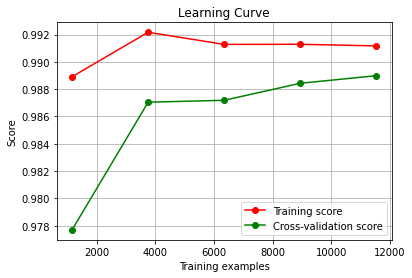

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_tree = {
    'max_depth': range(3, 8),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree regressor
tree_Classifier = DecisionTreeClassifier()

# Perform grid search
grid_search_tree = GridSearchCV(tree_Classifier, param_grid_tree, cv=10, n_jobs=-1, scoring='f1_weighted',
                           return_train_score=True)
grid_search_tree.fit(X_train, y_train)

DescionTClassifier_best_estimator = grid_search_tree.best_estimator_

evaluate_model_with_validation_classifier(DescionTClassifier_best_estimator, X_train, X_val,
                                          y_train, y_val)

# Plot learning curve
plot_learning_curve(DescionTClassifier_best_estimator, "Learning Curve",
                    X_train, y_train)


In [75]:
add_model_performance_classification(classification_performance_df, "Descion Tree", 0.99)

KNeighborsClassifier Training Set F1 Score: 1.00
KNeighborsClassifier Validation Set F1 Score: 0.98


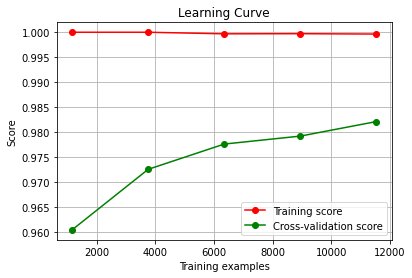

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#defining parameters
param_grid_knn = [
    {'n_neighbors': range(1, 11)}
]

knn_classifier = KNeighborsClassifier()

# Grid search
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=10, n_jobs=-1,
                              scoring= 'f1_weighted',
                           return_train_score=True)

grid_search_knn.fit(X_train, y_train)

knn_best_estimator = grid_search_knn.best_estimator_

evaluate_model_with_validation_classifier(knn_best_estimator, X_train, X_val,
                                          y_train, y_val)

# Plot learning curve
plot_learning_curve(knn_best_estimator, "Learning Curve",
                    X_train, y_train)

In [77]:
add_model_performance_classification(classification_performance_df, "KNN", 0.98)

In [78]:
X_test =scaled_RandomFClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = knn_best_estimator.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9869169624515871


In [39]:
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded labels back to original format
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

#  confusion matrix
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


KNN Confusion Matrix:
[[1847    0   11]
 [   0  184    2]
 [   9    4 2455]]


XGBClassifier Training Set F1 Score: 1.00
XGBClassifier Validation Set F1 Score: 0.99


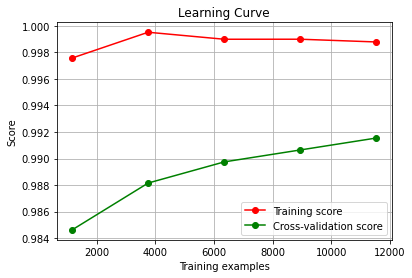

In [40]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Defining parameters
param_distribs_xgb = {
         'n_estimators': [100, 200, 300],           # Number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 5, 7],                    # Maximum depth of a tree
    'subsample': [0.8, 1.0],                   # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],            # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': np.arange(0.1, 1, 0.1),                # L1 regularization
    'reg_lambda': np.arange(0.1, 1, 0.1)                # L2 regularization
}

xgb_rnadom_search = xgb.XGBClassifier(random_state=10)

# randomized serach
rnd_search_xgb = RandomizedSearchCV(xgb_rnadom_search, param_distributions=param_distribs_xgb,
                                n_jobs=-1, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
rnd_search_xgb.fit(X_train, y_train)

xgb_best_estimator = rnd_search_xgb.best_estimator_

evaluate_model_with_validation_classifier(xgb_best_estimator, X_train, X_val,
                                          y_train, y_val)

# Plot learning curve
plot_learning_curve(xgb_best_estimator, "Learning Curve",
                    X_train, y_train)

In [80]:
add_model_performance_classification(classification_performance_df, "XGB", 0.99)

In [ ]:
# Ridge classifier do not support multiclass classification
#maybe avoid gradient descent

MultiOutputClassifier Training Set F1 Score: 0.97
MultiOutputClassifier Validation Set F1 Score: 0.97


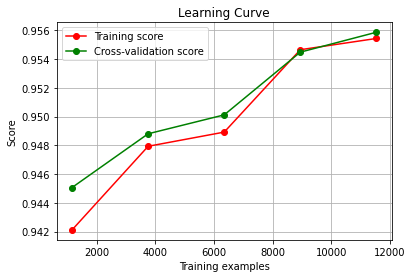

In [41]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Adjust the range of eta0 values to ensure they are all greater than 0
param_grid_SGD = {
    'estimator__alpha': np.arange(0.01, 1, 0.01),  # Range of alpha values for SGDClassifier
    'estimator__eta0': np.arange(0.01, 1, 0.01)  # Adjusted range for eta0
}

SGD_classifier = SGDClassifier(random_state=10, max_iter=10000, tol=1e-3, learning_rate='invscaling', penalty=None)

# Create the MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(SGD_classifier)

# Create the grid search
SGD_grid_search = GridSearchCV(multi_output_classifier, param_grid_SGD, cv=10, scoring='f1_weighted', n_jobs=-1, return_train_score=True)

# Fit the grid search
SGD_grid_search.fit(X_train, y_train)

# Get the best estimator
SGD_classifier_best_estimator = SGD_grid_search.best_estimator_

# Evaluate the best estimator
evaluate_model_with_validation_classifier(SGD_classifier_best_estimator, X_train, X_val, y_train, y_val)

# Plot learning curve
plot_learning_curve(SGD_classifier_best_estimator, "Learning Curve",
                    X_train, y_train)

In [95]:
add_model_performance_classification(classification_performance_df, "MultiOutputClassifier ", 0.97)

In [91]:
X_test =scaled_RandomFClass_test
y_test = test_label_1hot
# Use the trained model to make predictions on the test set
y_pred = SGD_classifier_best_estimator.predict(X_test)

# Evaluate the model's performance on the test set
test_f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Set:", test_f1_score)


F1 Score on Test Set: 0.9670659217773858


In [94]:
# next cell take a long timme...

from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Adjust the range of eta0 values to ensure they are all greater than 0
param_grid_SGD = {
    'estimator__alpha': np.arange(0.01, 1, 0.01),  # Range of alpha values for SGDClassifier
    'estimator__eta0': np.arange(0.01, 1, 0.01),    # Adjusted range for eta0
    'estimator__penalty': ['l1', 'l2', 'l1l2']              # Penalties to search
}

SGD_classifier = SGDClassifier(random_state=10, max_iter=10000, tol=1e-3, learning_rate='invscaling')

# Create the MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(SGD_classifier)

# Create the grid search
SGD_grid_search = GridSearchCV(multi_output_classifier, param_grid_SGD, cv=10, scoring='f1_weighted', n_jobs=-1, return_train_score=True)

# Fit the grid search
SGD_grid_search.fit(X_train, y_train)

# Get the best estimator
SGD_classifier_best_estimator = SGD_grid_search.best_estimator_

# Evaluate the best estimator
evaluate_model_with_validation_classifier(SGD_classifier_best_estimator, X_train, X_val, y_train, y_val)


LogisticRegression Training Set F1 Score: 0.98
LogisticRegression Validation Set F1 Score: 0.98


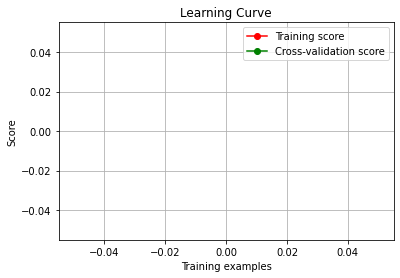

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import numpy as np

# Assuming y_train is your one-hot encoded labels
y_train_class_labels = np.argmax(y_train, axis=1)
y_val_class_labels = np.argmax(y_val, axis=1)


# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'solver': ['saga'],  # Use only 'saga' solver
    'multi_class': ['ovr', 'multinomial']  # Strategy for multiclass classification
}

# Instantiate logistic regression classifier
logistic_regression = LogisticRegression(max_iter=10000)

# Grid search with cross-validation
Logistic_grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='f1_weighted')

# Fit grid search to data
Logistic_grid_search.fit(X_train, y_train_class_labels)

# Access the best estimator
best_logistic_regression = Logistic_grid_search.best_estimator_

evaluate_model_with_validation_classifier(best_logistic_regression, X_train, X_val, y_train_class_labels, y_val_class_labels)

# Plot learning curve
plot_learning_curve(best_logistic_regression, "Learning Curve",
                    X_train, y_train)

In [96]:
# NN libraries
import tensorflow as tf
from tensorflow import keras
import random
from tensorflow.keras import regularizers

In [99]:
X_train.shape

(14435, 8)

In [100]:
y_train.shape

(14435, 3)

In [105]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification_1", project_name="my_rnd_search_classification"
)

random_search_tuner.search(X_train, y_train, epochs=100,
                           validation_data=(X_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 22s]
val_f1_m: 0.0

Best val_f1_m So Far: 0.6409881711006165
Total elapsed time: 00h 02m 48s


Epoch 1/100
452/452 [==============================] - 2s 2ms/step - loss: 0.8315 - accuracy: 0.5458 - f1_m: 0.6387 - val_loss: 0.8220 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8315 - accuracy: 0.5464 - f1_m: 0.6387 - val_loss: 0.8290 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8310 - accuracy: 0.5460 - f1_m: 0.6387 - val_loss: 0.8271 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8308 - accuracy: 0.5450 - f1_m: 0.6387 - val_loss: 0.8239 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8311 - accuracy: 0.5465 - f1_m: 0.6387 - val_loss: 0.8250 - val_accuracy: 0.5472 - val_f1_m: 0.6410
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 0.8305 - accuracy: 0.5451 - f1_m: 0.6387

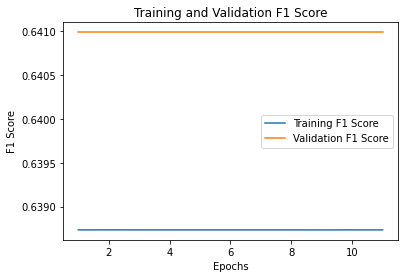

In [106]:
Classification_random_search = random_search_tuner.get_best_models(num_models=1)[0]

history = Classification_random_search.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [107]:
add_model_performance_classification(classification_performance_df, "NN+RandomSearch (overfitting) ", 0.64)

In [108]:
#Save the model
Classification_random_search.save("Classification_random_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [110]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L1 regularization strength
    l1_strength = hp.Choice('l1_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation,
                                 kernel_regularizer=regularizers.l1(l1_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification_1", project_name="my_rnd_search_classification_l1"
)

random_search_tuner.search(X_train, y_train, epochs=100,
                           validation_data=(X_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 14s]
val_f1_m: 0.9569800496101379

Best val_f1_m So Far: 0.9800110459327698
Total elapsed time: 00h 01m 27s


Epoch 1/100
452/452 [==============================] - 4s 3ms/step - loss: 0.1621 - accuracy: 0.9777 - f1_m: 0.9777 - val_loss: 0.1589 - val_accuracy: 0.9806 - val_f1_m: 0.9804
Epoch 2/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1563 - accuracy: 0.9798 - f1_m: 0.9791 - val_loss: 0.1768 - val_accuracy: 0.9734 - val_f1_m: 0.9734
Epoch 3/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1535 - accuracy: 0.9793 - f1_m: 0.9794 - val_loss: 0.1515 - val_accuracy: 0.9762 - val_f1_m: 0.9761
Epoch 4/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1502 - accuracy: 0.9794 - f1_m: 0.9794 - val_loss: 0.1498 - val_accuracy: 0.9787 - val_f1_m: 0.9786
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9796 - f1_m: 0.9796 - val_loss: 0.1423 - val_accuracy: 0.9798 - val_f1_m: 0.9797
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1441 - accuracy: 0.9794 - f1_m: 0.9794

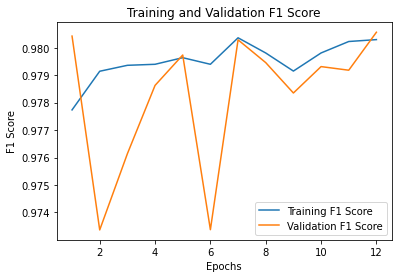

In [111]:
Classification_random_search_l1 = random_search_tuner.get_best_models(num_models=1)[0]

history = Classification_random_search_l1.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [112]:
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +L1 ", 0.98)

In [113]:
Classification_random_search_l1.save("Classification_random_search_l1.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [114]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # L1 regularization strength
    l2_strength = hp.Choice('l2_strength', values=list(np.arange(0.001, 0.01, 0.001)))
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation,
                                 kernel_regularizer=regularizers.l2(l2_strength))(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification_1", project_name="my_rnd_search_classification_l2"
)

random_search_tuner.search(X_train, y_train, epochs=100,
                           validation_data=(X_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 14s]
val_f1_m: 0.9608517289161682

Best val_f1_m So Far: 0.9819468855857849
Total elapsed time: 00h 01m 53s


Epoch 1/100
452/452 [==============================] - 4s 3ms/step - loss: 0.1096 - accuracy: 0.9770 - f1_m: 0.9770 - val_loss: 0.1052 - val_accuracy: 0.9795 - val_f1_m: 0.9795
Epoch 2/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9776 - f1_m: 0.9769 - val_loss: 0.1117 - val_accuracy: 0.9756 - val_f1_m: 0.9756
Epoch 3/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1130 - accuracy: 0.9764 - f1_m: 0.9765 - val_loss: 0.1100 - val_accuracy: 0.9709 - val_f1_m: 0.9707
Epoch 4/100
452/452 [==============================] - 2s 3ms/step - loss: 0.1037 - accuracy: 0.9782 - f1_m: 0.9783 - val_loss: 0.1248 - val_accuracy: 0.9701 - val_f1_m: 0.9701
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1023 - accuracy: 0.9792 - f1_m: 0.9792 - val_loss: 0.0973 - val_accuracy: 0.9792 - val_f1_m: 0.9792
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.1005 - accuracy: 0.9794 - f1_m: 0.9794

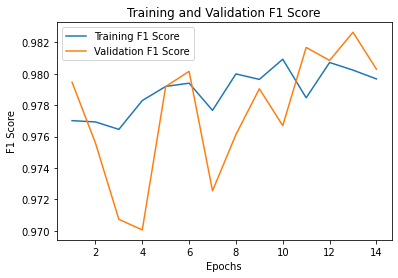

In [115]:
Classification_random_search_l2 = random_search_tuner.get_best_models(num_models=1)[0]

history = Classification_random_search_l2.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [116]:
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +L2 ", 0.98)

In [117]:
Classification_random_search_l2.save("Classification_random_search_l2.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [119]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    
    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        
    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5, directory="classification_1", project_name="my_rnd_search_classification_dropout"
)

random_search_tuner.search(X_train, y_train, epochs=100,
                           validation_data=(X_val, y_val),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 13s]
val_f1_m: 0.9742035269737244

Best val_f1_m So Far: 0.9829126596450806
Total elapsed time: 00h 01m 36s


Epoch 1/100
452/452 [==============================] - 3s 3ms/step - loss: 0.0682 - accuracy: 0.9775 - f1_m: 0.9776 - val_loss: 0.0622 - val_accuracy: 0.9823 - val_f1_m: 0.9822
Epoch 2/100
452/452 [==============================] - 2s 3ms/step - loss: 0.0635 - accuracy: 0.9794 - f1_m: 0.9787 - val_loss: 0.0678 - val_accuracy: 0.9795 - val_f1_m: 0.9795
Epoch 3/100
452/452 [==============================] - 2s 3ms/step - loss: 0.0631 - accuracy: 0.9793 - f1_m: 0.9792 - val_loss: 0.0740 - val_accuracy: 0.9817 - val_f1_m: 0.9817
Epoch 4/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0625 - accuracy: 0.9773 - f1_m: 0.9774 - val_loss: 0.0683 - val_accuracy: 0.9789 - val_f1_m: 0.9789
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9792 - f1_m: 0.9792 - val_loss: 0.0700 - val_accuracy: 0.9814 - val_f1_m: 0.9814
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9785 - f1_m: 0.9784

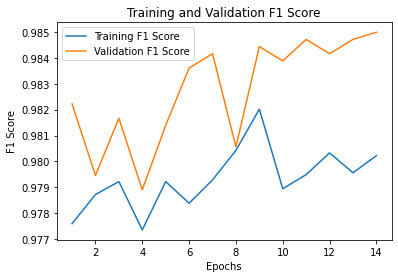

In [120]:
Classification_random_search_Dropout = random_search_tuner.get_best_models(num_models=1)[0]

history = Classification_random_search_Dropout.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [121]:
add_model_performance_classification(classification_performance_df, "NN+RandomSearch +Dropout (overfitts) ", 0.98)

In [122]:
Classification_random_search_Dropout.save("Classification_random_search_Dropout.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [123]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")


hyperband_tuner = kt.Hyperband(
    build_model, objective=objective, max_epochs=100,
    factor=3, directory="classification_1", project_name="my_hyperband_classification", seed=42)

hyperband_tuner.search(X_train, y_train, epochs=100,
                       validation_data=(X_val, y_val),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 254 Complete [00h 00m 11s]
val_f1_m: 0.9525333046913147

Best val_f1_m So Far: 0.9908738732337952
Total elapsed time: 00h 36m 41s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 0.0244 - accuracy: 0.9905 - f1_m: 0.9905 - val_loss: 0.0283 - val_accuracy: 0.9911 - val_f1_m: 0.9912
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0208 - accuracy: 0.9920 - f1_m: 0.9913 - val_loss: 0.0267 - val_accuracy: 0.9911 - val_f1_m: 0.9910
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9915 - f1_m: 0.9915 - val_loss: 0.0280 - val_accuracy: 0.9917 - val_f1_m: 0.9917
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0197 - accuracy: 0.9920 - f1_m: 0.9920 - val_loss: 0.0298 - val_accuracy: 0.9886 - val_f1_m: 0.9886
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 0.9921 - f1_m: 0.9921 - val_loss: 0.0309 - val_accuracy: 0.9895 - val_f1_m: 0.9895
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0209 - accuracy: 0.9920 - f1_m: 0.9920

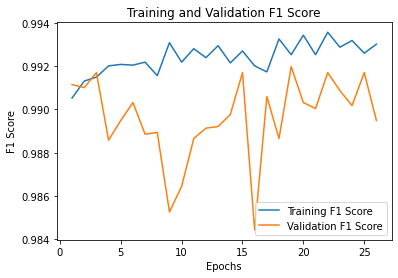

In [124]:
Classification_hyper_search = hyperband_tuner.get_best_models(num_models=1)[0]

history = Classification_hyper_search.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [125]:
add_model_performance_classification(classification_performance_df, "NN+Hyperband ", 0.98)

In [126]:
Classification_hyper_search.save("Classification_hyper_search.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [127]:
# Setting random seeds
import keras_tuner as kt
from keras import backend as K


np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()
        
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {}
    for name in optimizer_names:
        optimizer_objects[name] = getattr(tf.keras.optimizers, name)()

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)

    optimizer = optimizer_objects[optimizer]

    # Input layer
    inputs = tf.keras.layers.Input(shape=(8,))
    x = tf.keras.layers.Flatten()(inputs)

    # Hidden layers
    for _ in range(n_hidden):
        x = tf.keras.layers.Dense(n_neurons, activation=activation)(x)

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Constructing the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Define custom F1 score metric
    def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    
    # Compiling the model
    model.compile(loss="CategoricalCrossentropy", optimizer=optimizer,
                  metrics=['accuracy', f1_m])
    
    return model

objective = kt.Objective("val_f1_m", direction="max")


bayesian_opt_tuner = kt.BayesianOptimization(
    build_model, objective=objective, max_trials=5,
    directory="classification_1", project_name="my_bayesian_classification", seed=42)

bayesian_opt_tuner.search(X_train, y_train, epochs=100,
                       validation_data=(X_val, y_val),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])


Trial 5 Complete [00h 00m 15s]
val_f1_m: 0.9737820625305176

Best val_f1_m So Far: 0.9737820625305176
Total elapsed time: 00h 01m 12s


Epoch 1/100
452/452 [==============================] - 2s 3ms/step - loss: 0.0833 - accuracy: 0.9749 - f1_m: 0.9749 - val_loss: 0.0840 - val_accuracy: 0.9731 - val_f1_m: 0.9731
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9750 - f1_m: 0.9744 - val_loss: 0.0859 - val_accuracy: 0.9698 - val_f1_m: 0.9698
Epoch 3/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9763 - f1_m: 0.9764 - val_loss: 0.0806 - val_accuracy: 0.9731 - val_f1_m: 0.9730
Epoch 4/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.9764 - f1_m: 0.9764 - val_loss: 0.0805 - val_accuracy: 0.9753 - val_f1_m: 0.9754
Epoch 5/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9775 - f1_m: 0.9775 - val_loss: 0.0772 - val_accuracy: 0.9753 - val_f1_m: 0.9753
Epoch 6/100
452/452 [==============================] - 1s 3ms/step - loss: 0.0740 - accuracy: 0.9772 - f1_m: 0.9772

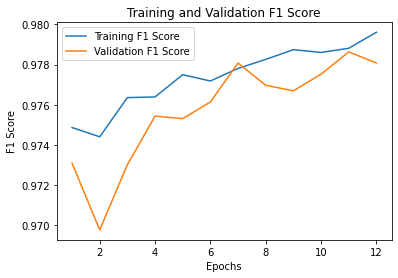

In [128]:
Classification_bayesian_opt = bayesian_opt_tuner.get_best_models(num_models=1)[0]

history = Classification_bayesian_opt.fit(X_train, y_train, epochs=100, 
                validation_data=(X_val, y_val),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10)])

f1 = history.history["f1_m"]
val_f1 = history.history["val_f1_m"]

# Plotting 
epochs = range(1, len(f1) + 1)

plt.plot(epochs, f1, label="Training F1 Score")
plt.plot(epochs, val_f1, label="Validation F1 Score")
plt.title("Training and Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


In [129]:
add_model_performance_classification(classification_performance_df, "NN+Bayesian ", 0.97)

In [130]:
Classification_bayesian_opt.save("Classification_bayesian_opt.h5")

/home/students/arazz002/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [131]:
classification_performance_df.to_csv('classification_performance_df.csv', index=False)

In [132]:
classification_performance_df = pd.read_csv('classification_performance_df.csv')

In [133]:
classification_performance_df

,Model,F1
0,Random Forest,0.99
1,Descion Tree,0.99
2,KNN,0.98
3,XGB,0.99
4,MultiOutputClassifier,0.97
5,NN+RandomSearch (overfitting),0.64
6,NN+RandomSearch +L1,0.98
7,NN+RandomSearch +L2,0.98
8,NN+RandomSearch +Dropout (overfitts),0.98
9,NN+Hyperband,0.98
